# **2º Projeto Prático - Dados - Análise de Dados e Predição com Python e Panda**

### João Vitor de Oliveira Ribas 
#### jvoribas@gmail.com
2024

### **Introdução**

Como parte do programa Desenvolve Boticário 2024, a seguir é apresentada a análise de uma base de dados de preços de aluguéis em São Paulo.

A análise compreendeu todos as etapas necessárias, como importação dos dados, limpeza, exploração, visualização e conclusões a partir dos dados.

Também foi realizado o ajuste de um modelo preditivo por meio de regressão linear, assim como a avaliação de seu desempenho.

### **Metodologia**
A análise dos dados foi realizada pelas seguintes etapas:

0. Importação das Bibliotecas
1. Importação dos Dados
2. Análise Exploratória dos Dados
3. Tratamento dos Dados
4. Preparação dos Dados
5. Ajuste dos Modelos (Regressão Linear, Regressão Linear(Huber), Random Forest e Gradient Boosting Tree)
6. Conclusão

# 0. Importação das Bibliotecas

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# 1. Importação dos Dados

In [2]:
df_bruto = pd.read_csv('base-alugueis-sp.csv')

# 2. Análise Exploratória dos Dados 

In [3]:
df_bruto.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [4]:
df_bruto.shape

(11657, 8)

In [5]:
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [6]:
df_bruto.describe().round(2)

,area,bedrooms,garage,rent,total
count,11657.00,11657.00,11657.00,11657.00,11657.00
mean,84.66,1.97,1.06,3250.81,4080.03
std,74.02,0.93,1.13,2650.71,3352.48
min,0.00,0.00,0.00,500.00,509.00
25%,40.00,1.00,0.00,1590.00,1996.00
50%,60.00,2.00,1.00,2415.00,3057.00
75%,96.00,3.00,2.00,3800.00,4774.00
max,580.00,6.00,6.00,25000.00,28700.00


In [7]:
df_bruto.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [8]:
df_bruto.isna().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [9]:
df_bruto = df_bruto.rename(columns={'address': 'Endereço', 'district': 'Distrito', 'area': 'Area', 'bedrooms': 'Quartos', 'garage': 'Garagem', 'type': 'Tipo', 'rent': 'Aluguel', 'total': 'Total'})

In [10]:
df_bruto.head()

,Endereço,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


Como o conjunto de dados não possui documentação, então não sabemos exatamente o que a coluna 'Total' representa.

Por esse motivo, vamos considerar que caso o imóvel possua taxa de condomínio, esse valor já estará agregado ao valor do aluguel. 

Dessa forma, vamos definir que a coluna 'Total' representa o valor do aluguel com a adição do valor do IPTU.

Então vamos criar essa nova categoria chamada 'IPTU' e remover a 'Total', pois as categorias restantes são mais úteis.

In [11]:
df_bruto['IPTU'] = df_bruto['Total'] - df_bruto['Aluguel']

In [12]:
df_bruto.drop('Total', axis=1, inplace=True)

In [13]:
df_bruto.head()

,Endereço,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,539
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,315
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,204
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,654


In [14]:
colunas_quantitativas = ['Area', 'Quartos', 'Garagem', 'Aluguel', 'IPTU']


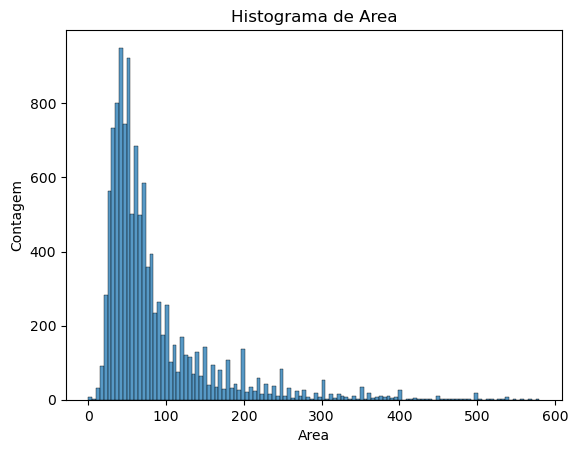

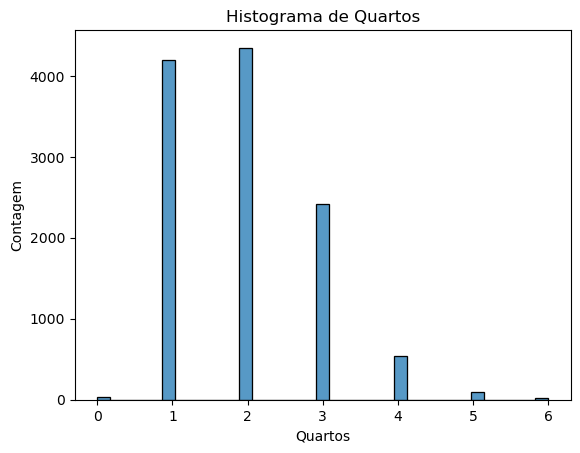

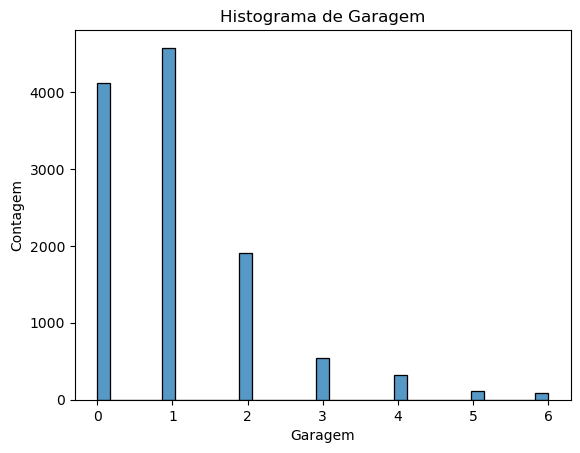

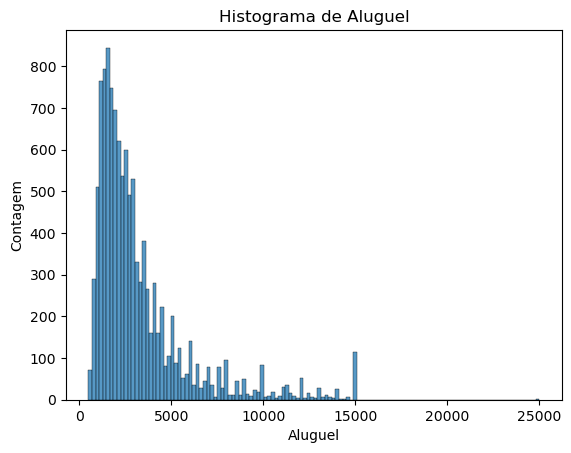

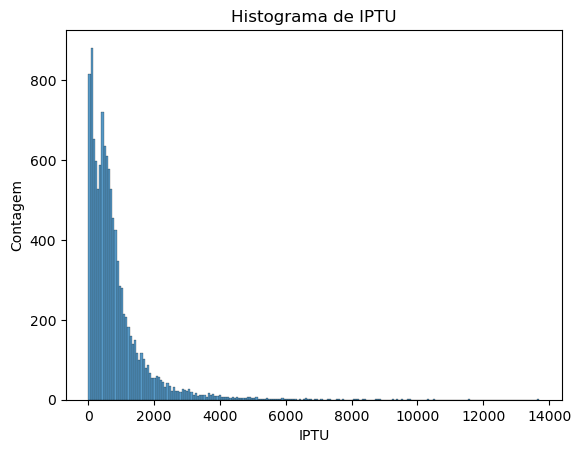

In [15]:
for column in colunas_quantitativas:
    sns.histplot(df_bruto[column])
    plt.title(f'Histograma de {column}')
    plt.ylabel('Contagem')
    plt.show()

Pelos histogramas gerais, não obtivemos nenhuma grande informação a respeito do conjunto de dados.

Então vamos separar o conjunto pelos tipos de imóveis e observar o restultado.

In [16]:
df_studio_kitnet = df_bruto.query('Tipo == "Studio e kitnet"')
print(df_studio_kitnet.shape)
df_studio_kitnet.head()

(1381, 8)


,Endereço,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,539
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,315
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,654
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,1727,517
12,Rua Henrique Sertório,Tatuapé,32,1,0,Studio e kitnet,2100,498


In [127]:
df_studio_kitnet.describe()

,Area,Quartos,Garagem,Aluguel,IPTU
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,31.742216,1.009413,0.260681,2127.825489,540.454743
std,10.125382,0.248003,0.469470,1365.744349,403.077090
min,1.000000,0.000000,0.000000,500.000000,13.000000
25%,25.000000,1.000000,0.000000,1200.000000,274.000000
50%,30.000000,1.000000,0.000000,1850.000000,489.000000
75%,37.000000,1.000000,0.000000,2790.000000,702.000000
max,130.000000,6.000000,3.000000,25000.000000,3391.000000


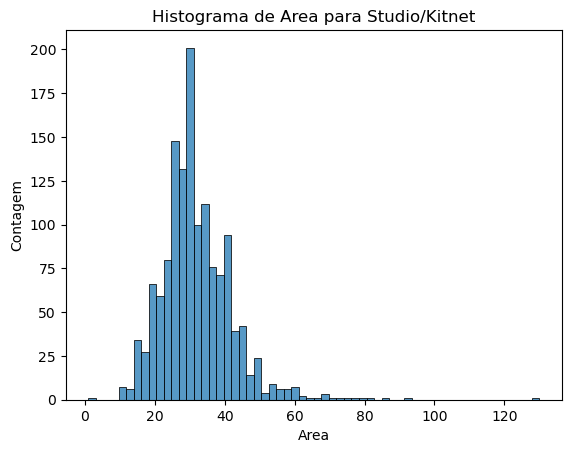

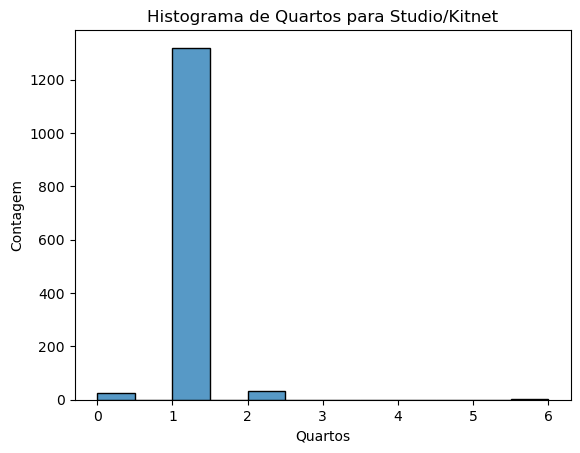

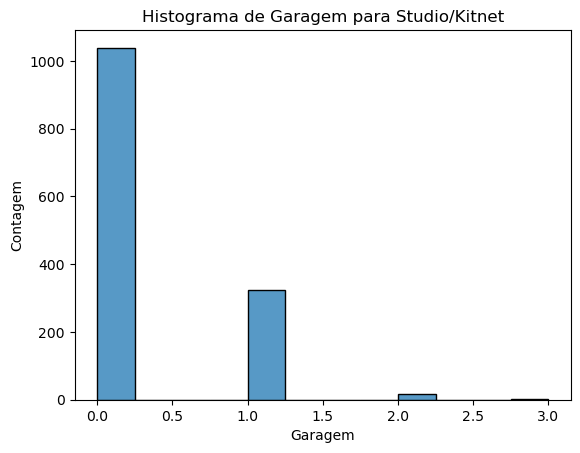

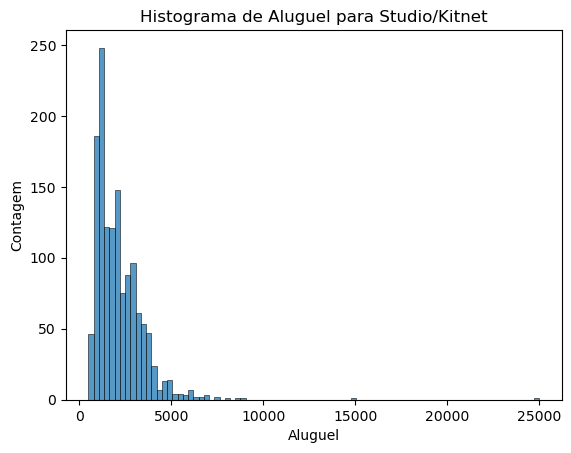

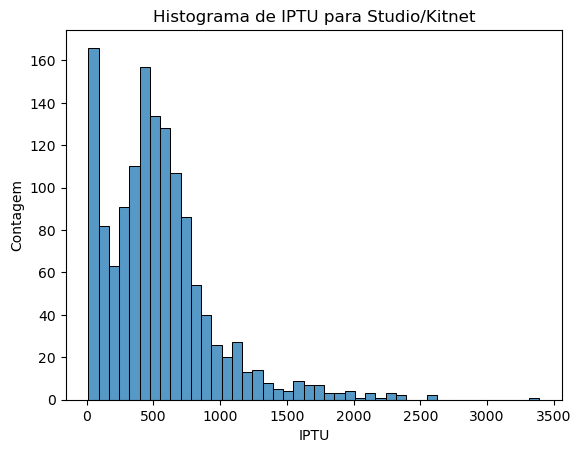

In [17]:
for column in colunas_quantitativas:
    sns.histplot(df_studio_kitnet[column])
    plt.title(f'Histograma de {column} para Studio/Kitnet')
    plt.ylabel('Contagem')
    plt.show()

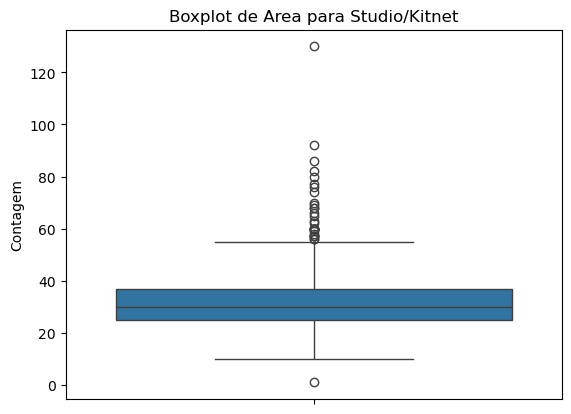

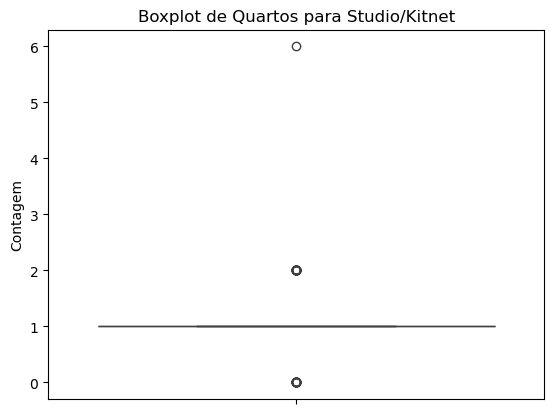

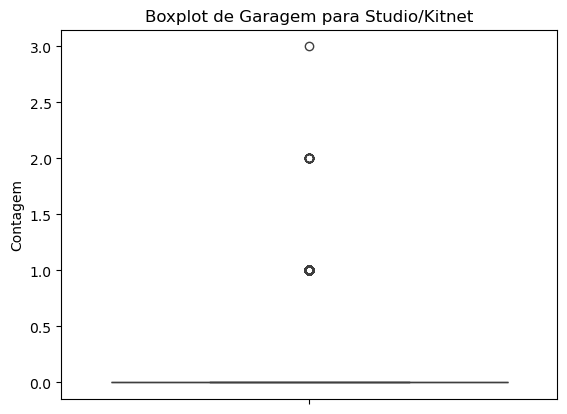

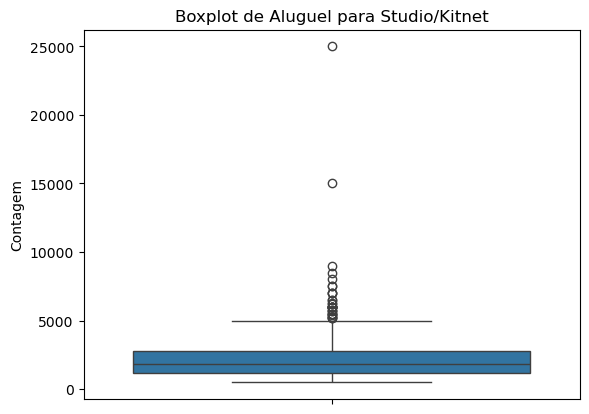

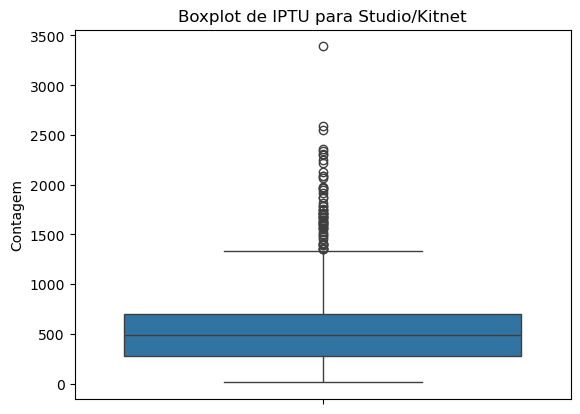

In [125]:
for column in colunas_quantitativas:
    sns.boxplot(df_studio_kitnet[column])
    plt.title(f'Boxplot de {column} para Studio/Kitnet')
    plt.ylabel('Contagem')
    plt.show()

In [19]:
df_apartamento = df_bruto.query('Tipo == "Apartamento"')
print(df_apartamento.shape)
df_apartamento.head()

(7194, 8)


,Endereço,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,661
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,787
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,1687
8,Rua José Peres Campelo,Piqueri,32,2,0,Apartamento,1200,392
9,Rua Guaperuvu,Vila Aricanduva,36,1,0,Apartamento,1200,301


In [126]:
df_apartamento.describe()

,Area,Quartos,Garagem,Aluguel,IPTU
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000
mean,73.318460,1.987907,1.022519,3356.902697,1078.525716
std,50.859956,0.798472,0.896132,2638.994113,1049.003501
min,0.000000,0.000000,0.000000,567.000000,13.000000
25%,45.000000,1.000000,0.000000,1700.000000,484.000000
50%,60.000000,2.000000,1.000000,2500.000000,774.500000
75%,81.000000,2.000000,1.000000,3899.750000,1297.000000
max,568.000000,6.000000,6.000000,15000.000000,13700.000000


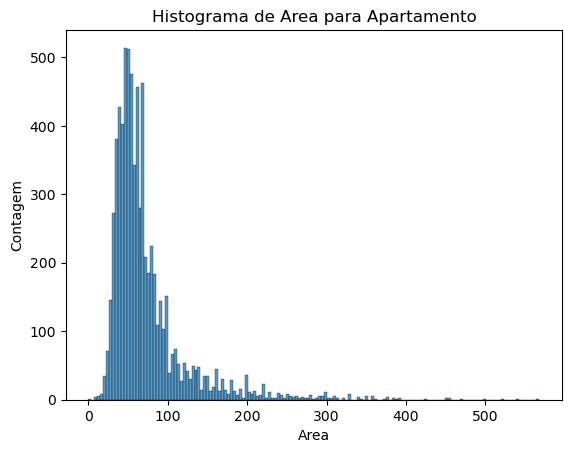

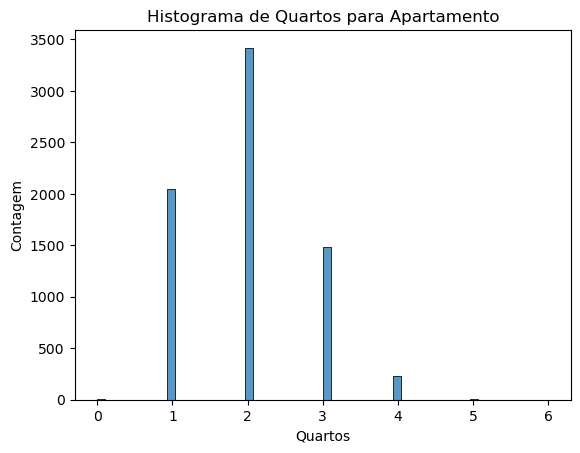

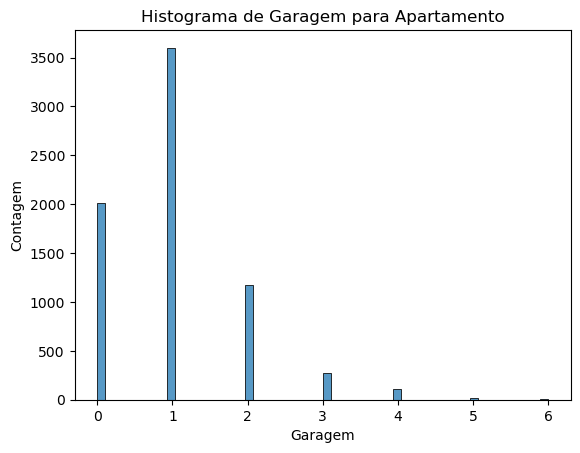

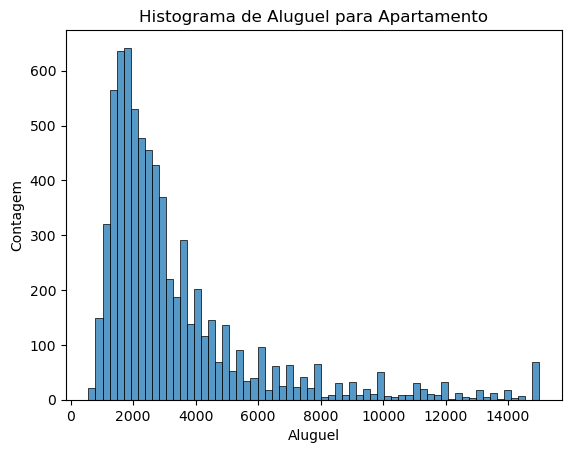

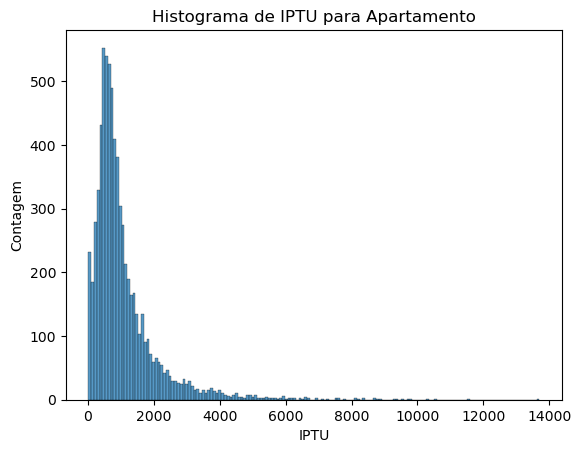

In [20]:
for column in colunas_quantitativas:
    sns.histplot(df_apartamento[column])
    plt.title(f'Histograma de {column} para Apartamento')
    plt.ylabel('Contagem')
    plt.show()

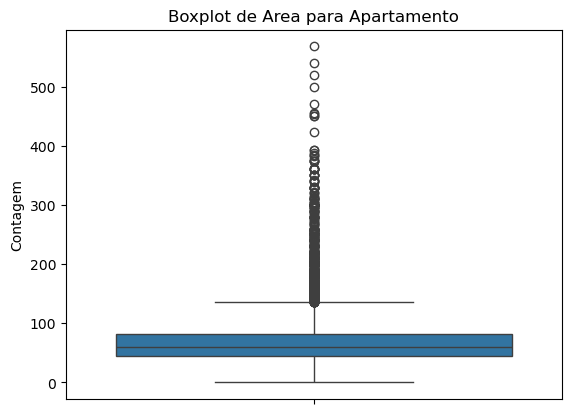

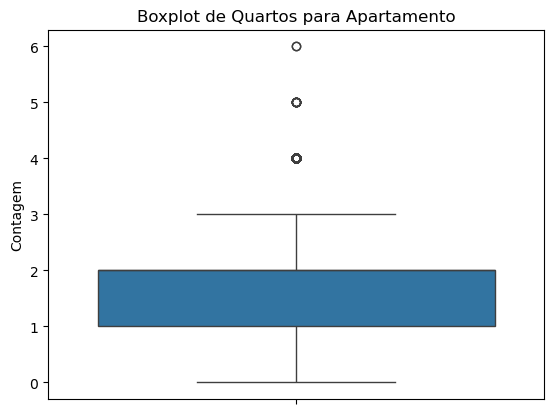

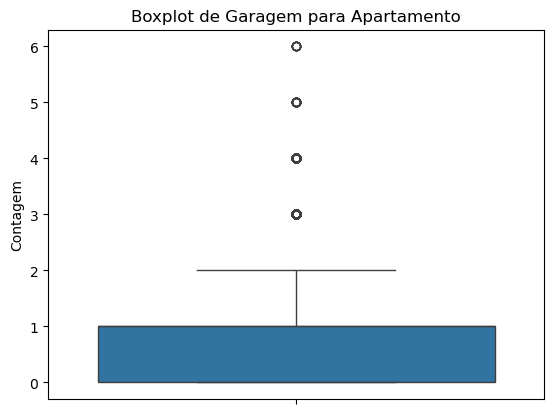

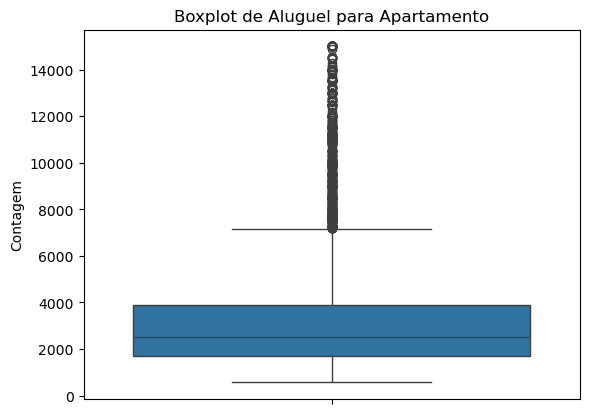

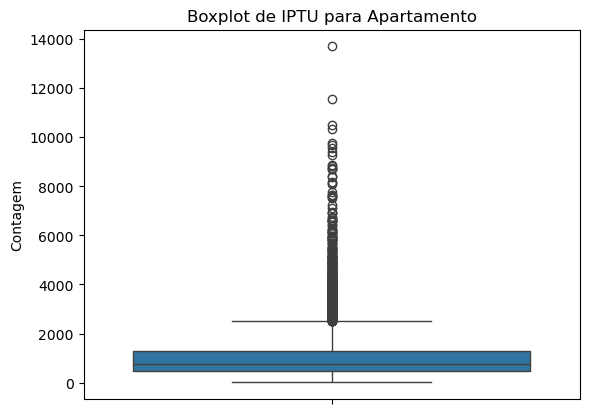

In [128]:
for column in colunas_quantitativas:
    sns.boxplot(df_apartamento[column])
    plt.title(f'Boxplot de {column} para Apartamento')
    plt.ylabel('Contagem')
    plt.show()

In [22]:
df_casa = df_bruto.query('Tipo == "Casa"')
print(df_casa.shape)
df_casa.head()

(2841, 8)


,Endereço,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU
14,Rua Orestes Barbosa,Jardim Paraventi,70,2,1,Casa,1600,168
15,Rua Scuvero,Cambuci,75,2,0,Casa,2266,156
18,Rua Guaraiuva,Cidade Monções,30,1,1,Casa,2394,144
29,Rua Marcelo Homem de Melo,Quarta Parada,62,2,0,Casa,2500,94
32,Rua Nova dos Portugueses,Chora Menino,100,3,2,Casa,2450,321


In [129]:
df_casa.describe()

,Area,Quartos,Garagem,Aluguel,IPTU
count,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000
mean,136.136220,2.353749,1.514960,3471.924674,352.319606
std,101.794391,1.103369,1.553462,2873.786579,501.148866
min,0.000000,0.000000,0.000000,500.000000,9.000000
25%,60.000000,1.000000,0.000000,1380.000000,97.000000
50%,110.000000,2.000000,1.000000,2600.000000,193.000000
75%,180.000000,3.000000,2.000000,4500.000000,418.000000
max,580.000000,6.000000,6.000000,15000.000000,7380.000000


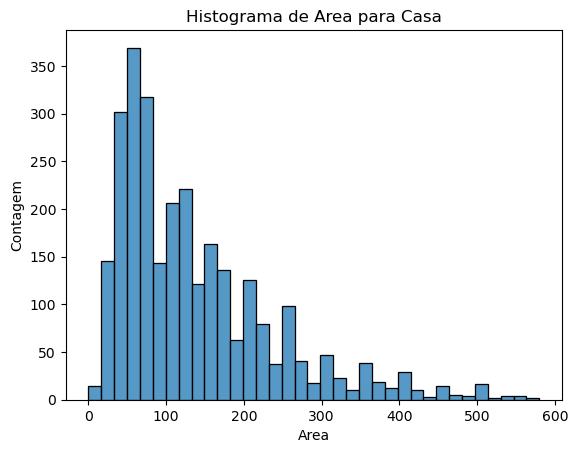

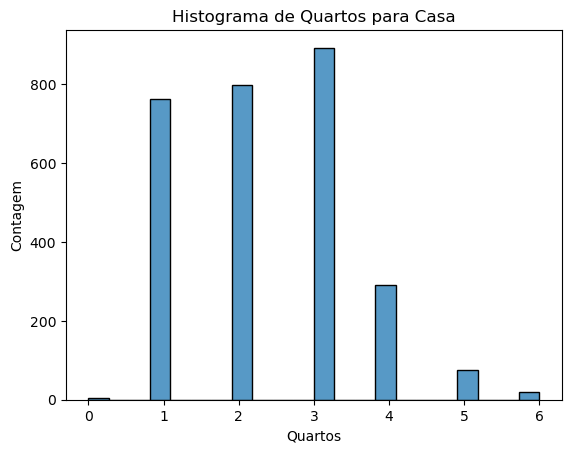

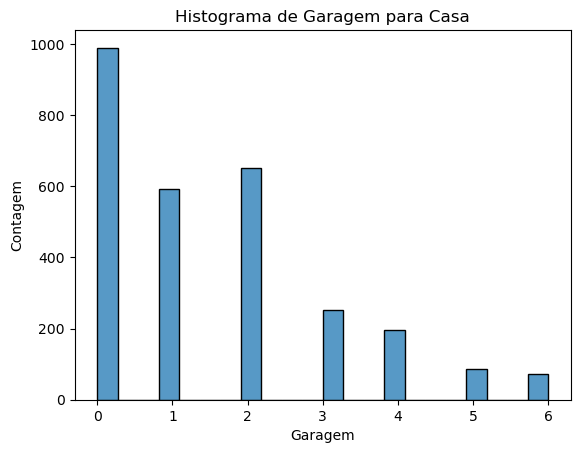

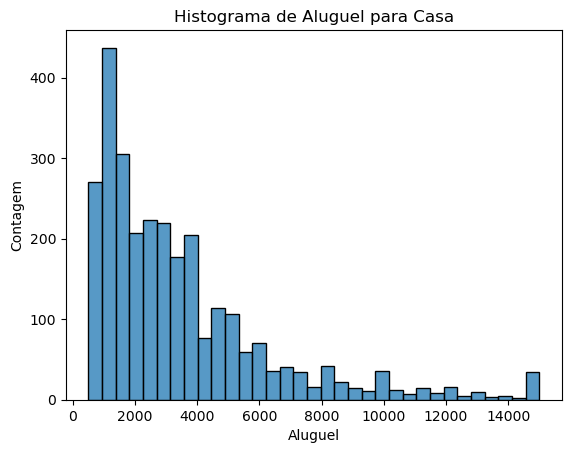

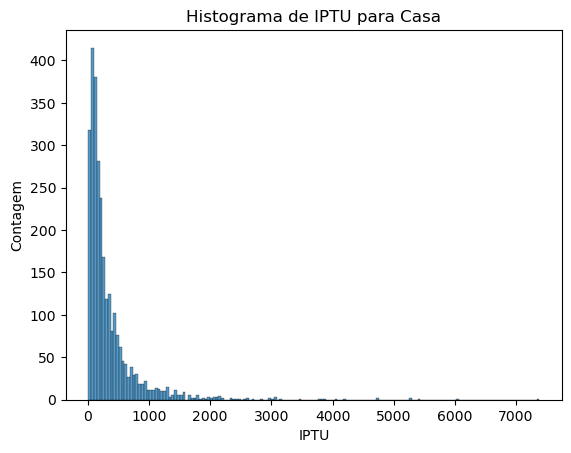

In [23]:
for column in colunas_quantitativas:
    sns.histplot(df_casa[column])
    plt.title(f'Histograma de {column} para Casa')
    plt.ylabel('Contagem')
    plt.show()

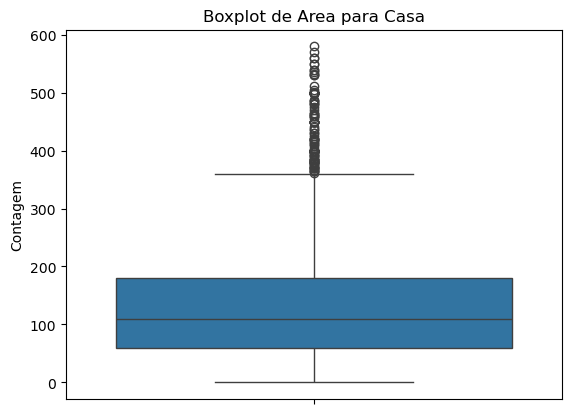

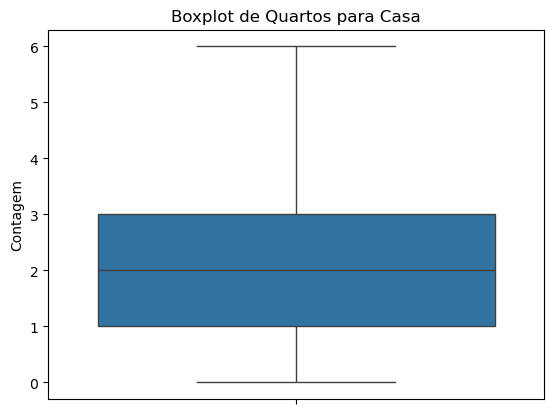

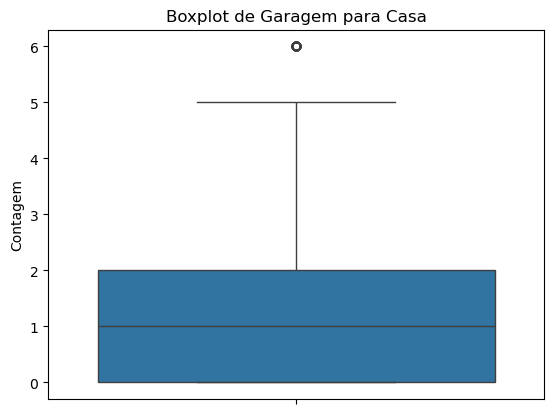

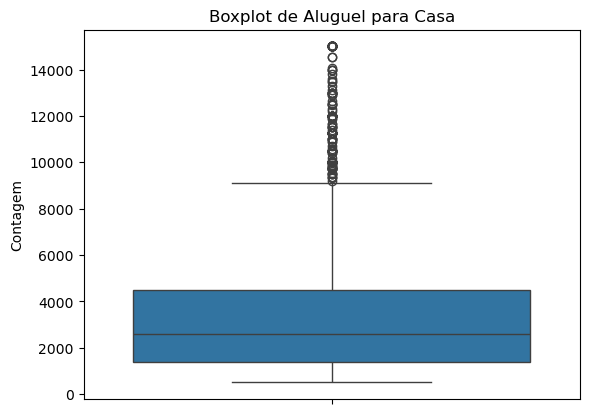

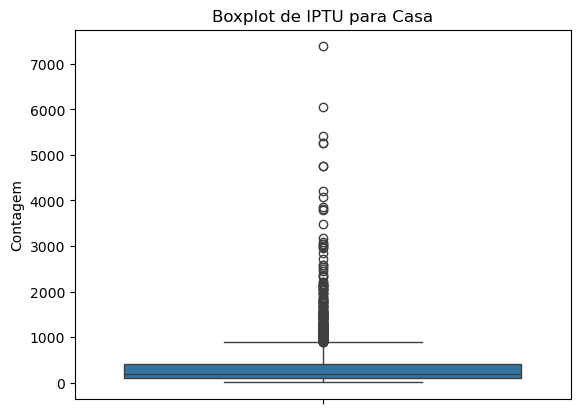

In [130]:
for column in colunas_quantitativas:
    sns.boxplot(df_casa[column])
    plt.title(f'Boxplot de {column} para Casa')
    plt.ylabel('Contagem')
    plt.show()

In [25]:
df_casa_cond = df_bruto.query('Tipo == "Casa em condomínio"')
print(df_casa_cond.shape)
df_casa_cond.head()

(241, 8)


,Endereço,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,204
13,Rua Herison,Lauzane Paulista,50,3,0,Casa em condomínio,1437,80
89,Rua Tanque Velho,Vila Nivi,42,2,0,Casa em condomínio,1500,125
96,Rua Afonso Morsch,Vila Constança,75,2,1,Casa em condomínio,4000,67
215,Avenida Francisco Rodrigues,Vila Constança,64,2,1,Casa em condomínio,2200,213


In [131]:
df_casa_cond.describe()

,Area,Quartos,Garagem,Aluguel,IPTU
count,241.000000,241.000000,241.000000,241.000000,241.000000
mean,119.414938,2.236515,1.414938,3912.551867,663.680498
std,113.205206,1.059714,1.444106,3930.906662,930.247051
min,1.000000,1.000000,0.000000,504.000000,22.000000
25%,50.000000,1.000000,0.000000,1400.000000,124.000000
50%,75.000000,2.000000,1.000000,2200.000000,307.000000
75%,140.000000,3.000000,2.000000,4000.000000,712.000000
max,560.000000,6.000000,6.000000,15000.000000,6140.000000


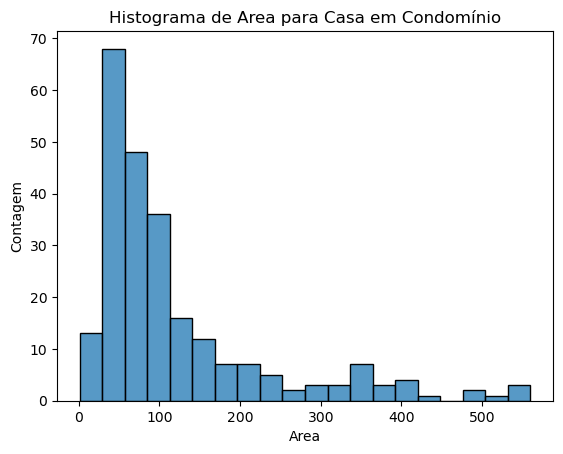

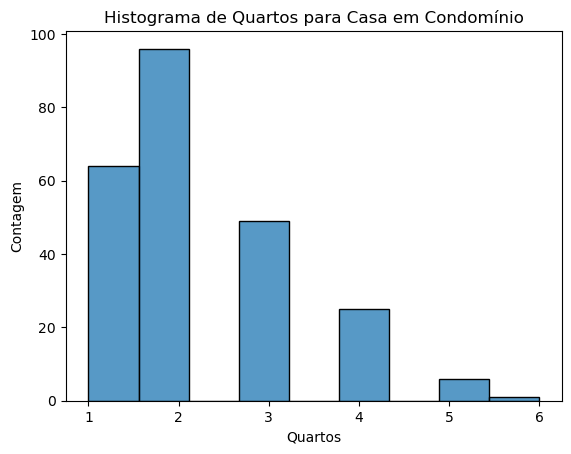

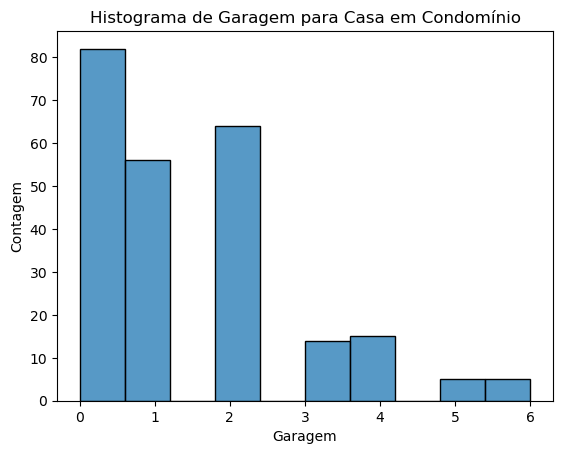

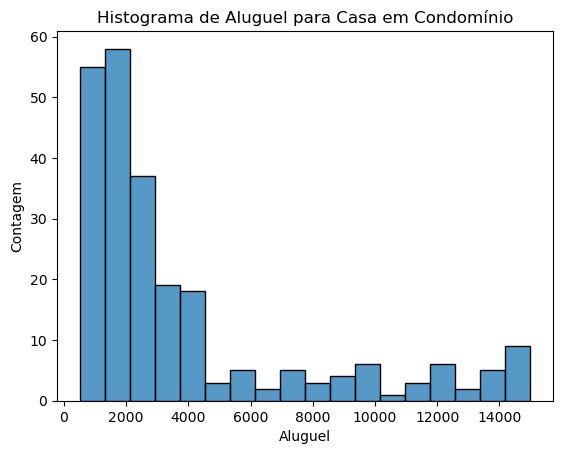

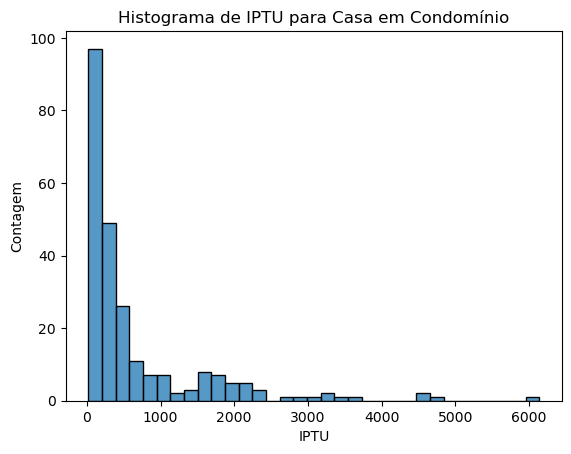

In [26]:
for column in colunas_quantitativas:
    sns.histplot(df_casa_cond[column])
    plt.title(f'Histograma de {column} para Casa em Condomínio')
    plt.ylabel('Contagem')
    plt.show()

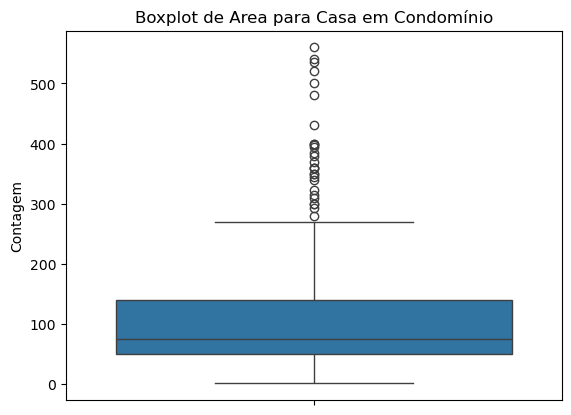

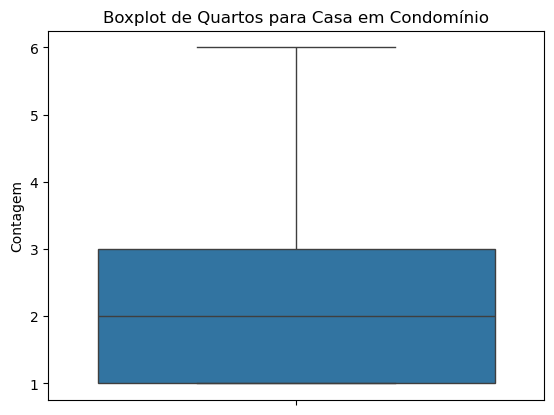

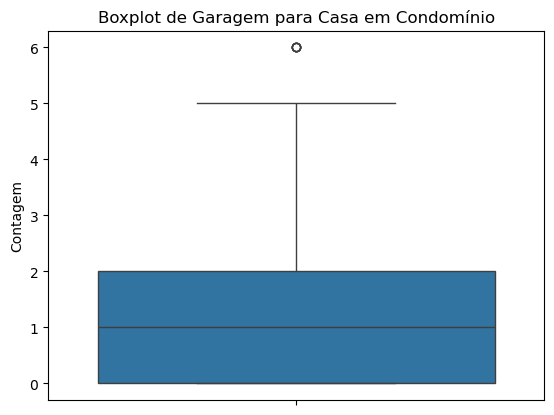

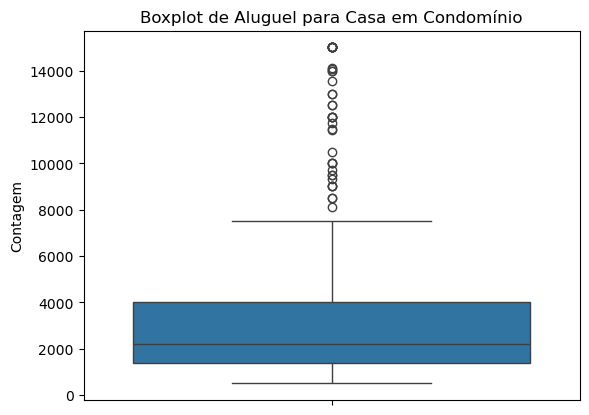

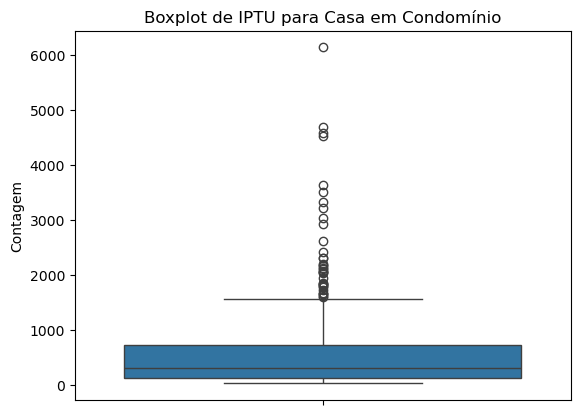

In [133]:
for column in colunas_quantitativas:
    sns.boxplot(df_casa_cond[column])
    plt.title(f'Boxplot de {column} para Casa em Condomínio')
    plt.ylabel('Contagem')
    plt.show()

Pelos gráficos já podemos entender um pouco melhor do nosso conjunto de dados.



In [152]:
medias_por_tipo = df_bruto.groupby('Tipo').mean(numeric_only=True)

medias_por_tipo.head()

,Area,Quartos,Garagem,Aluguel,IPTU
Tipo,,,,,
Apartamento,73.318460,1.987907,1.022519,3356.902697,1078.525716
Casa,136.136220,2.353749,1.514960,3471.924674,352.319606
Casa em condomínio,119.414938,2.236515,1.414938,3912.551867,663.680498
Studio e kitnet,31.742216,1.009413,0.260681,2127.825489,540.454743


Comparando os extremos, podemos observar:

1 - 'Studio e kitnet' é o que possui a menor média em área, quartos, garagem e aluguel.

2 - 'Casa' é o que possui a maior média em área, quartos e garagem.

3 - 'Casa em condomínio' é o que possui a maior média em aluguel.

4 - 'Apartamente' é o que possui a maior média em iptu.

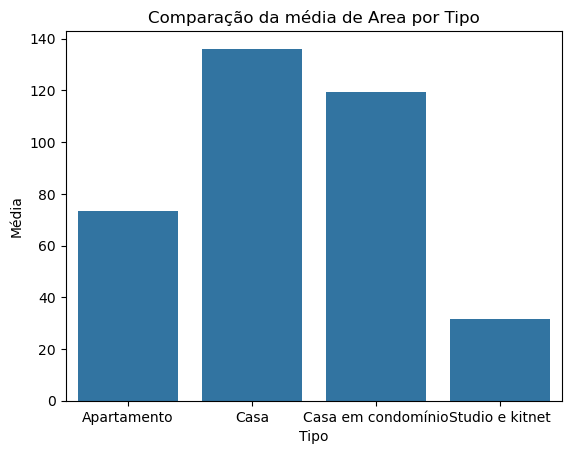

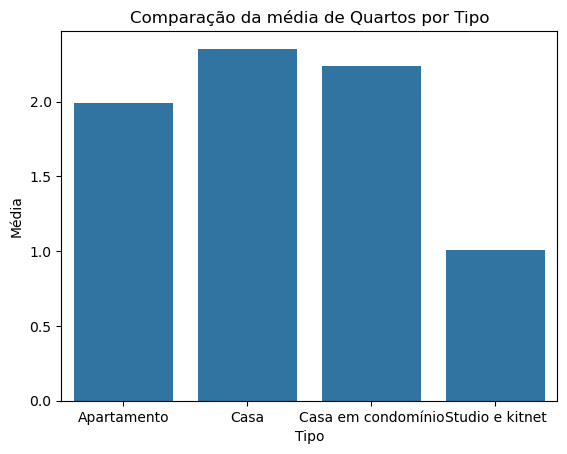

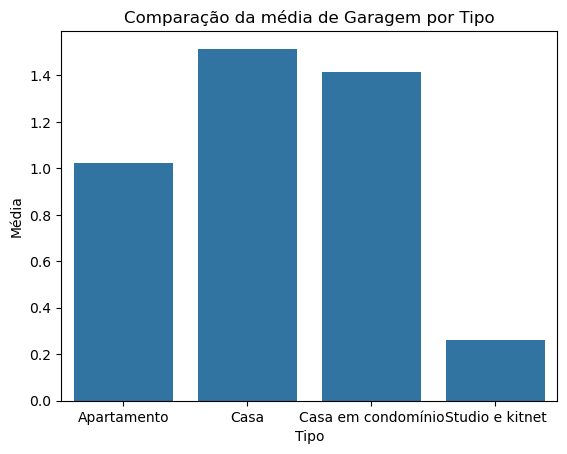

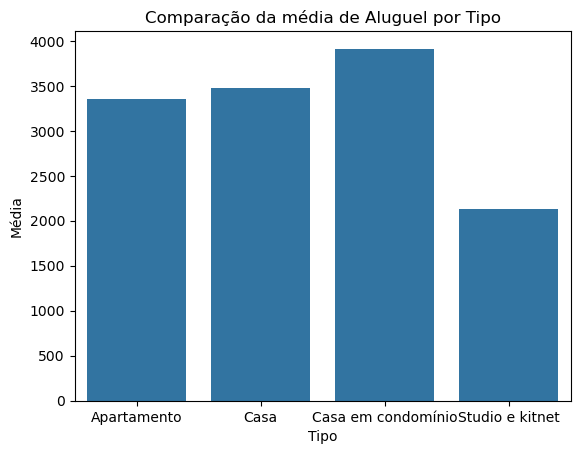

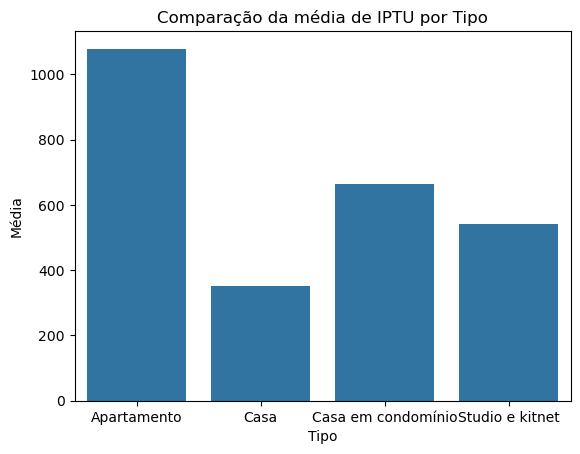

In [153]:
for column in colunas_quantitativas:
    sns.barplot(medias_por_tipo[column])
    plt.title(f'Comparação da média de {column} por Tipo')
    plt.ylabel('Média')
    plt.show()

# 3. Tratamento dos Dados

Agora vamos começar a realizar alguns ajustes no conjunto de dados, ainda buscando entender melhor o conjunto de dados e corrigir possíveis erros.

Após verificarmos que no conjunto de dados não há dados nulos ou vazios, decidimos realizar uma busca a partir de resultados lógicos.

A primeira busca é por imóveis em que sua área e o seu número de quartos sejam igual a zero. 

Para a relação da área, sua justificativa é direta, não faz sentido um imóvel sem área.

Já para o número de quartos, é possível pensar que talvez para o tipo de imóvel "Studio e kitnet" esse valor possa ser justificado de alguma forma, então temos analisar com cuidado esse tipo de imóvel.

In [28]:
df_bruto_quartos_zero = df_bruto.query('Quartos == 0 | Area == 0')
print(df_bruto_quartos_zero.shape)
df_bruto_quartos_zero

(39, 8)


,Endereço,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU
71,Rua Natividade Saldanha,São Lucas,22,0,0,Studio e kitnet,900,226
98,Rua Natividade Saldanha,São Lucas,19,0,0,Studio e kitnet,850,202
163,Rua João José Pacheco,Jardim Vila Mariana,22,0,0,Studio e kitnet,2200,608
259,Rua Riskallah Jorge,Centro Histórico de São Paulo,28,0,0,Studio e kitnet,1207,440
476,Rua Doutor Miguel Vieira Ferreira,Tatuapé,30,0,0,Apartamento,1840,273
493,Rua Natividade Saldanha,São Lucas,32,0,0,Studio e kitnet,1200,332
569,Rua Albino Boldasso Gabril,Vila Cruzeiro,44,0,0,Studio e kitnet,1400,198
604,Rua Natividade Saldanha,São Lucas,29,0,0,Studio e kitnet,1150,302
631,Avenida São João,Santa Cecilia,35,0,0,Studio e kitnet,935,413
708,Rua Doutor Albuquerque Lins,Santa Cecília,63,0,0,Studio e kitnet,1600,586


A nossa query apresentou 39 imóveis com "Quartos == 0 | Area == 0", comparando com o tamanho do nosso conjunto de dados, é um número pequeno.

Por ser uma quantidade baixa, poderiamos verificar realizar alguma ação de forma individual, linhas por linha.

Porém, vamos analisar por meio de quantos % esses imóveis representam em cada tipo.

In [29]:
df_bruto_quartos_zero_values = df_bruto_quartos_zero.reset_index()
values_quartos_zero = pd.DataFrame(df_bruto_quartos_zero_values['Tipo'].value_counts()).reset_index()
values_quartos_zero.columns = ['Tipo', 'Quantidades']
values_quartos_zero

,Tipo,Quantidades
0,Studio e kitnet,26
1,Apartamento,8
2,Casa,5


In [30]:
values_bruto_tipo = pd.DataFrame(df_bruto['Tipo'].value_counts()).reset_index()
values_bruto_tipo.columns = ['Tipo', 'Quantidades']
values_bruto_tipo

,Tipo,Quantidades
0,Apartamento,7194
1,Casa,2841
2,Studio e kitnet,1381
3,Casa em condomínio,241


In [31]:
studiokitnet_1 = values_quartos_zero.loc[0, 'Quantidades']
apartamento_1 = values_quartos_zero.loc[1, 'Quantidades']
casa_1 = values_quartos_zero.loc[2, 'Quantidades']

In [32]:
studiokitnet_2 = values_bruto_tipo.loc[2, 'Quantidades']
apartamento_2 = values_bruto_tipo.loc[0, 'Quantidades']
casa_2 = values_bruto_tipo.loc[1, 'Quantidades']

In [33]:
porcentagem_studiokitnet = (studiokitnet_1 / studiokitnet_2)*100
print(f'A quantidade de Studio/Kitnet com "Quartos == 0 | Area ==0" representa {porcentagem_studiokitnet.round(2)}% do conjunto total.')

A quantidade de Studio/Kitnet com "Quartos == 0 | Area ==0" representa 1.88% do conjunto total.


In [34]:
porcentagem_apartamento = (apartamento_1 / apartamento_2)*100
print(f'A quantidade de Apartamentos com "Quartos == 0 | Area ==0" representa {porcentagem_apartamento.round(2)}% do conjunto total.')

A quantidade de Apartamentos com "Quartos == 0 | Area ==0" representa 0.11% do conjunto total.


In [35]:
porcentagem_casa = (casa_1 / casa_2)*100
print(f'A quantidade de Casa com "Quartos == 0 | Area ==0" representa {porcentagem_casa.round(2)}% do conjunto total.')

A quantidade de Casa com "Quartos == 0 | Area ==0" representa 0.18% do conjunto total.


Como esses valores de fato representam uma porcentagem muito pequena do conjunto total, vamos apenas removê-las.

In [36]:
registros_a_remover = df_bruto_quartos_zero.index

In [37]:
df_filtrado = df_bruto.drop(registros_a_remover, axis=0)

In [38]:
df_filtrado.query('Area == 0 | Quartos == 0')

,Endereço,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU


Pela proposta do projeto, um os objetivos que devemos realizar é ajustar um modelo de regressão linear aos dados para tentar prever o preço do aluguel em uma determinada área.

Vamos interpretar que "determinada área" diz respeito sobre região geográfica da cidade.

Como temos duas categorias que nos informam sobre isso, temos que analisa-lás.

In [39]:
df_filtrado['Endereço'].value_counts()

Endereço
Rua da Consolação                     49
Rua Bela Cintra                       46
Avenida Brigadeiro Luís Antônio       35
Avenida Ipiranga                      32
Avenida Nove de Julho                 29
                                      ..
Dona Maria Pera                        1
Rua Passo da Pátria                    1
Rua Teixeira Leite                     1
Avenida Professor Abraão de Morais     1
Rua Abílio Borin                       1
Name: count, Length: 5345, dtype: int64

In [40]:
df_filtrado['Distrito'].value_counts()

Distrito
Bela Vista               350
Vila Mariana             232
Jardim Paulista          220
Centro                   177
Pinheiros                159
                        ... 
Jardim do Carmo            1
Santa Inês                 1
Jardim Santa Efigenia      1
Vila Maricy                1
Retiro Morumbi             1
Name: count, Length: 1199, dtype: int64

Pela nossa busca, identificamos que a categoria que melhor agrupa o conjunto de dados é a categoria 'Distrito'.

Então vamos remover a categoria 'Endereço'.

In [41]:
df_filtrado.drop('Endereço', axis=1, inplace=True)

In [42]:
df_filtrado.head()

,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU
0,Belenzinho,21,1,0,Studio e kitnet,2400,539
1,Vila Marieta,15,1,1,Studio e kitnet,1030,315
2,Pinheiros,18,1,0,Apartamento,4000,661
3,Vila Ré,56,2,2,Casa em condomínio,1750,204
4,Bela Vista,19,1,0,Studio e kitnet,4000,654


Surge uma nova questão, temos 1199 distritos diferentes no conjunto de dados, sendo que a lista oficial de distritos para a cidade de São Paulo possui apenas 96.

A partir disso, temos duas hipoteses que podem explicar essa discrepância:

1° - O conjunto de dados é sobre a região metropolitana de São Paulo, que reúne 39 municípios.

2° - O conjunto tem variação na escrita do nome dos distritos, então o mesmo distrito pode estar sendo contado individualmente apenas por ter algum variação na forma que seu nome foi escrito.


# 4. Preparação dos Dados

Por causa da situação encontrada na categoria 'Distrito', vamos testar algumas manipulações buscando tornar o conjunto de dados mais organizado.

Nesse primeiro momento, vamos preparar 2 conjuntos de dados para testar a modelagem por regressão linear:

Modelo 1 - Conjunto de dados apenas com os distritos oficiais.

Modelo 2 - Conjunto de dados dos distritos oficiais e agrupados pelas regiões (central, norte, leste, oeste e sul).

Antes de mais nada, vamos conferir como estão as correlações do conjunto de dados.

In [43]:
df_corr = df_filtrado[colunas_quantitativas]
df_corr.corr()

,Area,Quartos,Garagem,Aluguel,IPTU
Area,1.000000,0.730630,0.733156,0.666598,0.444892
Quartos,0.730630,1.000000,0.657800,0.533265,0.378249
Garagem,0.733156,0.657800,1.000000,0.616563,0.463822
Aluguel,0.666598,0.533265,0.616563,1.000000,0.670083
IPTU,0.444892,0.378249,0.463822,0.670083,1.000000


<Axes: >

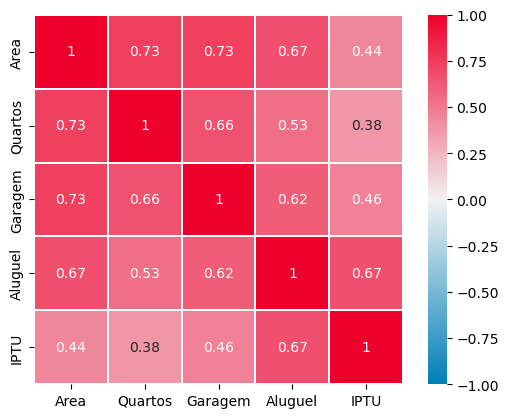

In [44]:
cmap = sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
)
sns.heatmap(
    df_corr.corr(),
    cmap=cmap,
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.01,
    annot=True,
    xticklabels=colunas_quantitativas,
    yticklabels=colunas_quantitativas,
)

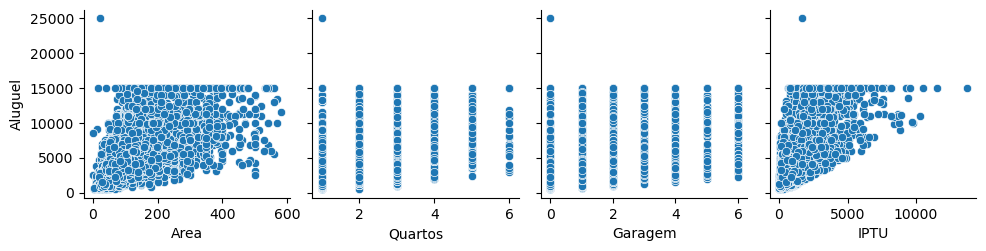

In [45]:
sns.pairplot(df_filtrado, y_vars='Aluguel', x_vars=['Area', 'Quartos', 'Garagem', 'IPTU'])

Agora vamos adicionar índices as categorias 'Tipo' e 'Distrito', para que posssamos transforma-lás em variáveis dummy para o modelo.

In [46]:
df_prep1 = df_filtrado.copy()

In [47]:
tipos_imoveis = df_prep1['Tipo'].unique()
tipos_id = {tipo: idx for idx, tipo in enumerate(tipos_imoveis, start=1)}
print(tipos_id)

{'Studio e kitnet': 1, 'Apartamento': 2, 'Casa em condomínio': 3, 'Casa': 4}


In [48]:
df_prep1['Tipo_ID'] = df_prep1['Tipo'].map(tipos_id)

In [49]:
df_prep1.head()

,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU,Tipo_ID
0,Belenzinho,21,1,0,Studio e kitnet,2400,539,1
1,Vila Marieta,15,1,1,Studio e kitnet,1030,315,1
2,Pinheiros,18,1,0,Apartamento,4000,661,2
3,Vila Ré,56,2,2,Casa em condomínio,1750,204,3
4,Bela Vista,19,1,0,Studio e kitnet,4000,654,1


In [50]:
distritos_unicos = df_prep1['Distrito'].unique()
distrito_id = {distrito: idx for idx, distrito in enumerate(distritos_unicos, start=1)}
print(distrito_id)

{'Belenzinho': 1, 'Vila Marieta': 2, 'Pinheiros': 3, 'Vila Ré': 4, 'Bela Vista': 5, 'Brás': 6, 'Brooklin Paulista': 7, 'Centro': 8, 'Piqueri': 9, 'Vila Aricanduva': 10, 'Sé': 11, 'Tatuapé': 12, 'Lauzane Paulista': 13, 'Jardim Paraventi': 14, 'Cambuci': 15, 'Liberdade': 16, 'Cidade Monções': 17, 'Água Branca': 18, 'Mooca': 19, 'Chácara Inglesa': 20, 'Vila Moreira': 21, 'Gopoúva': 22, 'Jardim São Savério': 23, 'Vila Amalia (zona Norte)': 24, 'Saúde': 25, 'Quarta Parada': 26, 'Santa Efigênia': 27, 'Paraíso do Morumbi': 28, 'Chora Menino': 29, 'Vila Medeiros': 30, 'Vila Guarani(zona Leste)': 31, 'Barra Funda': 32, 'Vila Augusta': 33, 'Vila Olímpia': 34, 'Vila Celeste': 35, 'Jardim Independência': 36, 'Vila Buarque': 37, 'Vila Vivaldi': 38, 'Vila Brasílio Machado': 39, 'Vila Carlos de Campos': 40, 'Vila Prudente': 41, 'Vila Andrade': 42, 'Campos Elíseos': 43, 'Vila Nivi': 44, 'Vila Palmeiras': 45, 'Ponte Grande': 46, 'Vila Marina': 47, 'Jardim Pereira Leite': 48, 'Jardim Utinga': 49, 'Repúb

In [51]:
df_prep1['Distrito_ID'] = df_prep1['Distrito'].map(distrito_id)

In [52]:
df_prep1.head()

,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU,Tipo_ID,Distrito_ID
0,Belenzinho,21,1,0,Studio e kitnet,2400,539,1,1
1,Vila Marieta,15,1,1,Studio e kitnet,1030,315,1,2
2,Pinheiros,18,1,0,Apartamento,4000,661,2,3
3,Vila Ré,56,2,2,Casa em condomínio,1750,204,3,4
4,Bela Vista,19,1,0,Studio e kitnet,4000,654,1,5


In [53]:
df_prep1.shape

(11618, 9)

In [54]:
colunas_float = ['Area', 'Aluguel', 'IPTU']
colunas_int = ['Quartos', 'Garagem', 'Distrito_ID', 'Tipo_ID']

In [55]:
df_prep1[colunas_float] = df_prep1[colunas_float].astype(float)
df_prep1[colunas_int] = df_prep1[colunas_int].astype(int)
df_prep1.dtypes

Distrito        object
Area           float64
Quartos          int32
Garagem          int32
Tipo            object
Aluguel        float64
IPTU           float64
Tipo_ID          int32
Distrito_ID      int32
dtype: object

In [56]:
df_prep2 = df_prep1.copy()
df_prep2.head()

,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU,Tipo_ID,Distrito_ID
0,Belenzinho,21.0,1,0,Studio e kitnet,2400.0,539.0,1,1
1,Vila Marieta,15.0,1,1,Studio e kitnet,1030.0,315.0,1,2
2,Pinheiros,18.0,1,0,Apartamento,4000.0,661.0,2,3
3,Vila Ré,56.0,2,2,Casa em condomínio,1750.0,204.0,3,4
4,Bela Vista,19.0,1,0,Studio e kitnet,4000.0,654.0,1,5


In [57]:
zn_centro = ['Bela Vista', 'Bom Retiro', 'Brás', 'Cambuci', 'Consolação', 'Liberdade', 'Pari', 'República', 'Santa Cecília', 'Sé']

zn_norte = ['Anhanguera', 'Brasilândia', 'Cachoeirinha', 'Casa Verde', 'Freguesia do Ó', 'Jacana', 'Jaçanã', 'Jaraguá', 'Limão', 'Perus', 'Santana', 'Tremembé', 'Tucuruvi', 'Vila Guilherme', 'Vila Maria', 'Vila Medeiros']

zn_sul = ['Campo Belo', 'Campo Grande', 'Campo Limpo', 'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra', 'Cidade Líder', 'Cidade Tiradentes', 'Grajaú', 'Ipiranga', 'Jabaquara', 'Jardim Ângela', 'Jardim São Luís', 'Jardim Paulista', 'Jardim Helena', 'Marsilac', 'Moema', 'Mooca', 'Morumbi', 'Parelheiros', 'Pedreira', 'Sacomã', 'Santo Amaro', 'Socorro', 'São Lucas', 'São Mateus', 'São Rafael', 'Sapopemba', 'Saúde', 'Vila Andrade', 'Vila Mariana', 'Vila Mascote', 'Vila Olímpia', 'Vila Sonia']

zn_leste = ['Água Rasa', 'Aricanduva', 'Artur Alvim', 'Belém', 'Cangaíba', 'Carrão', 'Ermelino Matarazzo', 'Guaianases', 'Iguatemi', 'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'José Bonifácio', 'Lageado', 'Penha', 'Ponte Rasa', 'São Miguel', 'São Mateus', 'São Rafael', 'São Lucas', 'Sapopemba', 'Tatuapé', 'Vila Curuçá', 'Vila Esperança', 'Vila Formosa']

zn_oeste = ['Alto de Pinheiros', 'Barra Funda', 'Butantã', 'Jaguara', 'Jaguaré', 'Lapa', 'Pacaembu', 'Perdizes', 'Pinheiros', 'Pirituba', 'Raposo Tavares', 'Rio Pequeno', 'Vila Leopoldina']


dist_ofc = zn_centro + zn_leste + zn_norte + zn_oeste + zn_sul

In [58]:
distrito_zona_map = {}

for distrito in zn_centro:
    distrito_zona_map[distrito] = 'Centro'
for distrito in zn_leste:
    distrito_zona_map[distrito] = 'Leste'
for distrito in zn_norte:
    distrito_zona_map[distrito] = 'Norte'
for distrito in zn_oeste:
    distrito_zona_map[distrito] = 'Oeste'
for distrito in zn_sul:
    distrito_zona_map[distrito] = 'Sul'

In [59]:
df_prep2['Zonas'] = df_prep2['Distrito'].map(distrito_zona_map)

In [60]:
zonas_unicas = df_prep2['Zonas'].unique()
zonas_id = {zonas: idx for idx, zonas in enumerate(zonas_unicas, start=1)}
print(zonas_id)

{nan: 1, 'Oeste': 2, 'Centro': 3, 'Leste': 4, 'Sul': 5, 'Norte': 6}


In [61]:
df_prep2['Zonas_ID'] = df_prep2['Zonas'].map(zonas_id)

In [62]:
df_prep2['Zonas'].unique()

array([nan, 'Oeste', 'Centro', 'Leste', 'Sul', 'Norte'], dtype=object)

In [63]:
df_prep2.head()

,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU,Tipo_ID,Distrito_ID,Zonas,Zonas_ID
0,Belenzinho,21.0,1,0,Studio e kitnet,2400.0,539.0,1,1,NaN,1
1,Vila Marieta,15.0,1,1,Studio e kitnet,1030.0,315.0,1,2,NaN,1
2,Pinheiros,18.0,1,0,Apartamento,4000.0,661.0,2,3,Oeste,2
3,Vila Ré,56.0,2,2,Casa em condomínio,1750.0,204.0,3,4,NaN,1
4,Bela Vista,19.0,1,0,Studio e kitnet,4000.0,654.0,1,5,Centro,3


In [64]:
df_dist_ofc = df_prep2[df_prep2["Distrito"].isin(dist_ofc)]
print(df_dist_ofc.shape)
df_dist_ofc.head()

(3689, 11)


,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU,Tipo_ID,Distrito_ID,Zonas,Zonas_ID
2,Pinheiros,18.0,1,0,Apartamento,4000.0,661.0,2,3,Oeste,2
4,Bela Vista,19.0,1,0,Studio e kitnet,4000.0,654.0,1,5,Centro,3
5,Brás,50.0,2,1,Apartamento,3800.0,787.0,2,6,Centro,3
10,Sé,63.0,2,0,Apartamento,1500.0,520.0,2,11,Centro,3
11,Sé,34.0,1,0,Apartamento,1000.0,406.0,2,11,Centro,3


In [65]:
df_dist_ofc.describe()

,Area,Quartos,Garagem,Aluguel,IPTU,Tipo_ID,Distrito_ID,Zonas_ID
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,77.014096,1.838439,0.894280,3500.051504,985.356194,2.089455,102.399024,3.972079
std,67.918389,0.915300,1.015975,2667.434023,1012.698053,0.825384,143.775817,1.288415
min,1.000000,1.000000,0.000000,504.000000,13.000000,1.000000,3.000000,2.000000
25%,37.000000,1.000000,0.000000,1850.000000,429.000000,2.000000,16.000000,3.000000
50%,55.000000,2.000000,1.000000,2700.000000,695.000000,2.000000,87.000000,4.000000
75%,87.000000,2.000000,1.000000,4000.000000,1174.000000,2.000000,142.000000,5.000000
max,580.000000,6.000000,6.000000,15000.000000,11550.000000,4.000000,1129.000000,6.000000


In [66]:
df_dist_ofc['Distrito_ID'].value_counts()

Distrito_ID
5       350
102     232
152     220
3       159
87      155
       ... 
634       1
815       1
934       1
970       1
1098      1
Name: count, Length: 70, dtype: int64

In [67]:
df_dist_ofc['Zonas_ID'].value_counts()

Zonas_ID
5    1413
3    1152
2     536
6     354
4     234
Name: count, dtype: int64

In [68]:
df_colunas = ['Area', 'Quartos', 'Garagem', 'Aluguel', 'IPTU', 'Tipo_ID',  'Distrito_ID', 'Zonas_ID']

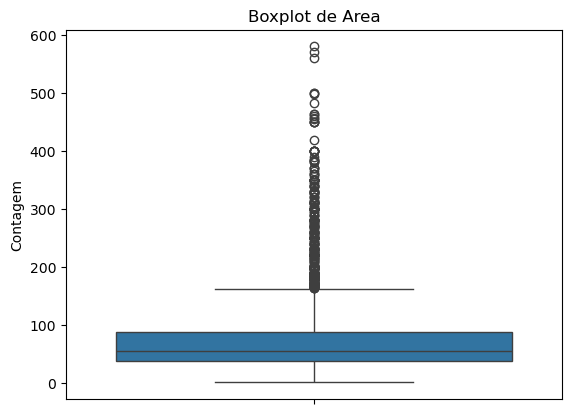

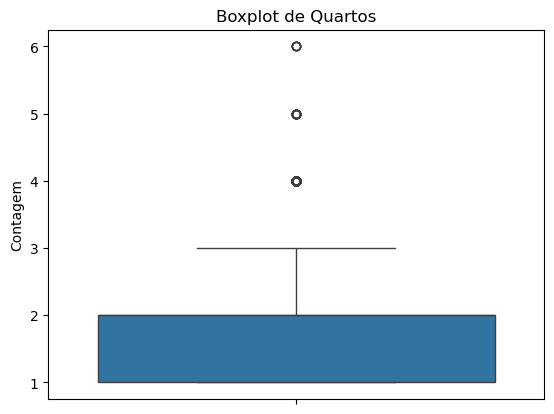

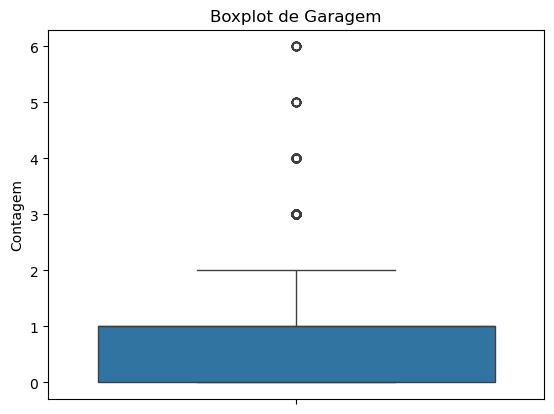

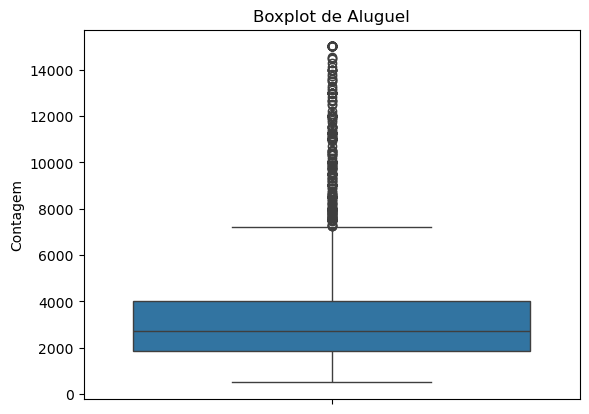

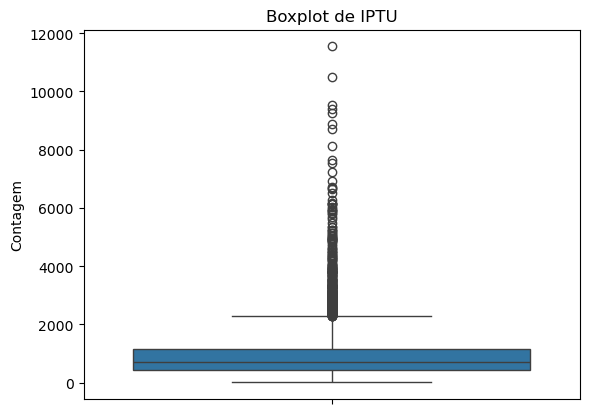

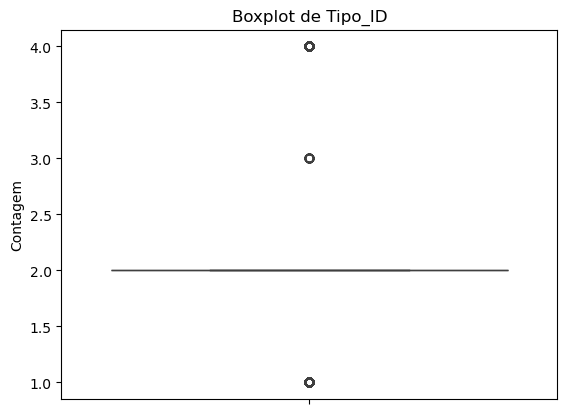

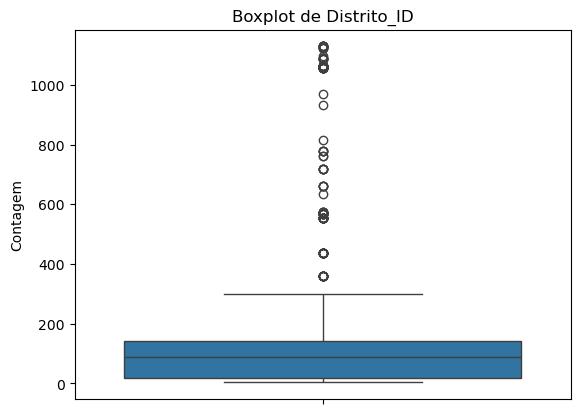

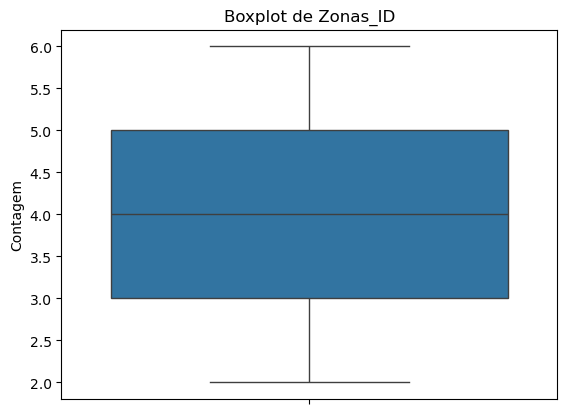

In [69]:
for column in df_colunas:
    sns.boxplot(df_dist_ofc[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel('Contagem')
    plt.show()

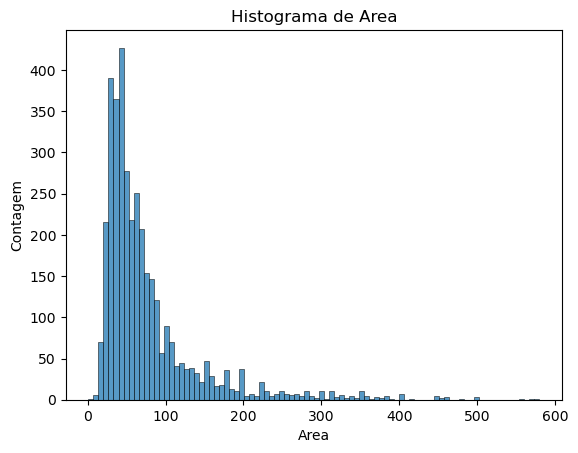

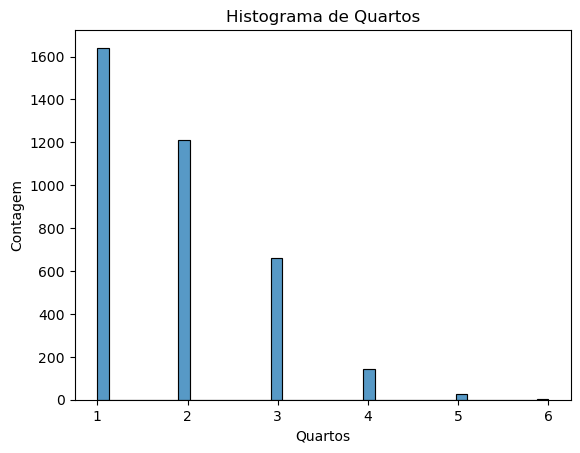

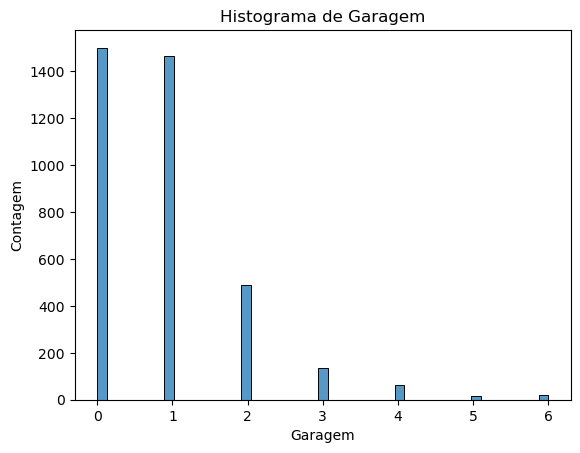

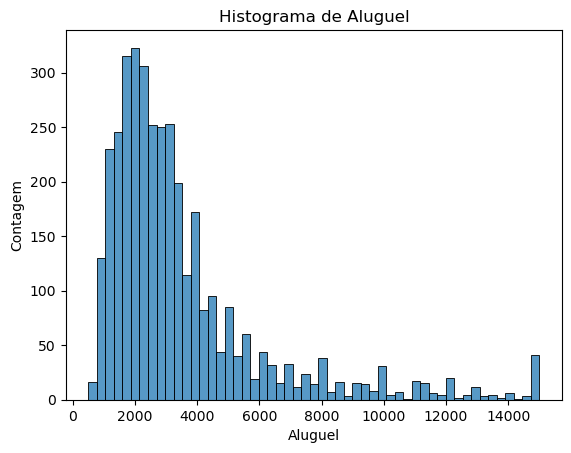

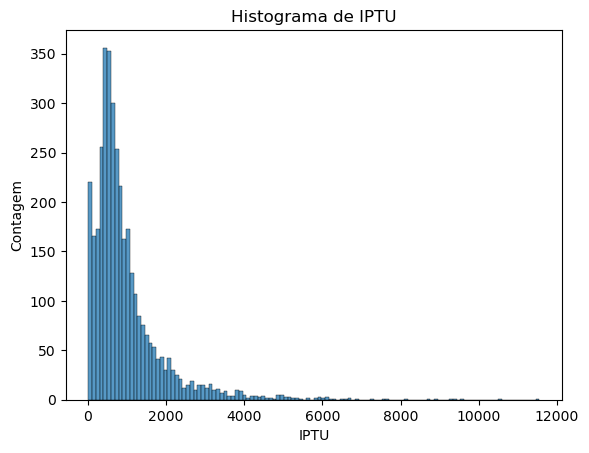

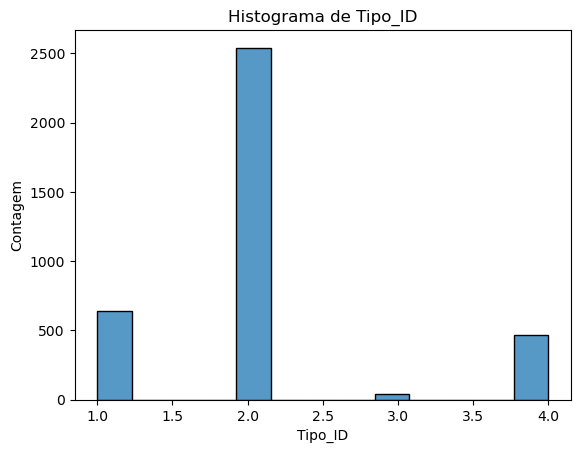

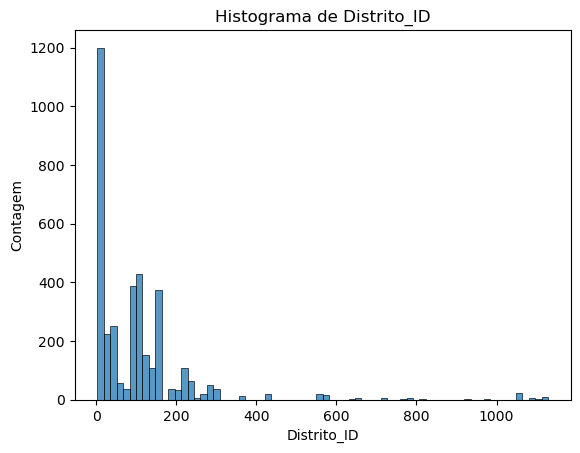

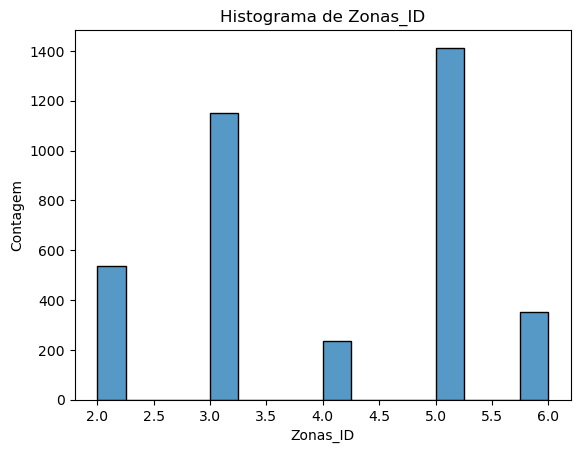

In [70]:
for column in df_colunas:
    sns.histplot(df_dist_ofc[column])
    plt.title(f'Histograma de {column}')
    plt.ylabel('Contagem')
    plt.show()

# 5. Ajuste dos Modelos

Agora vamos realizar o ajuste dos modelos preditivos.

Vamos iniciar pelo modelo de regressão linear.

In [71]:
df_benchmark_ofc = df_dist_ofc.copy()

In [72]:
df_benchmark_ofc.head()

,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,IPTU,Tipo_ID,Distrito_ID,Zonas,Zonas_ID
2,Pinheiros,18.0,1,0,Apartamento,4000.0,661.0,2,3,Oeste,2
4,Bela Vista,19.0,1,0,Studio e kitnet,4000.0,654.0,1,5,Centro,3
5,Brás,50.0,2,1,Apartamento,3800.0,787.0,2,6,Centro,3
10,Sé,63.0,2,0,Apartamento,1500.0,520.0,2,11,Centro,3
11,Sé,34.0,1,0,Apartamento,1000.0,406.0,2,11,Centro,3


In [73]:
df_benchmark_ofc.drop(['Distrito', 'Tipo', 'Zonas'], axis=1, inplace=True)

In [74]:
df_benchmark_ofc.head()

,Area,Quartos,Garagem,Aluguel,IPTU,Tipo_ID,Distrito_ID,Zonas_ID
2,18.0,1,0,4000.0,661.0,2,3,2
4,19.0,1,0,4000.0,654.0,1,5,3
5,50.0,2,1,3800.0,787.0,2,6,3
10,63.0,2,0,1500.0,520.0,2,11,3
11,34.0,1,0,1000.0,406.0,2,11,3


In [75]:
df_benchmark_ofc.shape

(3689, 8)

In [76]:
categorias_benchmark1 = ['Distrito_ID','Tipo_ID']
categorias_benchmark2 = ['Zonas_ID','Tipo_ID']
numericas_benchmark = ['Area', 'Quartos', 'Garagem']
target_benchmark = 'Aluguel'

Vamos separar em dois conjuntos:
X_bench1 utilizará a categoria 'Distritos_ID' e X_bench2 utilizará a categoria 'Zonas_ID'.

In [104]:
X_bench1 = pd.get_dummies(df_benchmark_ofc.drop(['Zonas_ID'], axis=1), columns=categorias_benchmark1)
X_bench2 = pd.get_dummies(df_benchmark_ofc.drop(['Distrito_ID'], axis=1), columns=categorias_benchmark2)

In [105]:
X_bench1.head()

,Area,Quartos,Garagem,Aluguel,IPTU,Distrito_ID_3,Distrito_ID_5,Distrito_ID_6,Distrito_ID_11,Distrito_ID_12,...,Distrito_ID_1063,Distrito_ID_1086,Distrito_ID_1089,Distrito_ID_1098,Distrito_ID_1122,Distrito_ID_1129,Tipo_ID_1,Tipo_ID_2,Tipo_ID_3,Tipo_ID_4
2,18.0,1,0,4000.0,661.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,19.0,1,0,4000.0,654.0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,50.0,2,1,3800.0,787.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
10,63.0,2,0,1500.0,520.0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
11,34.0,1,0,1000.0,406.0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [79]:
def regressao_linear(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo = LinearRegression()
    
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    r2 = r2_score(y_test, y_pred).round(2)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    ax = sns.scatterplot(x=y_pred, y=y_test)
    return
    

Mean Squared Error: 2496173.65
R^2 Score: 0.66


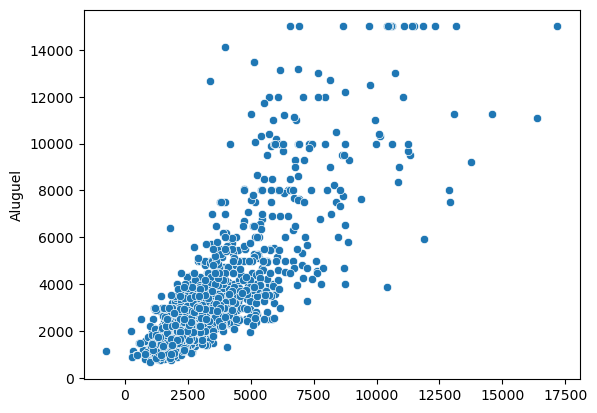

In [107]:
regressao_linear(X_bench1, target_benchmark)

Mean Squared Error: 2684160.43
R^2 Score: 0.63


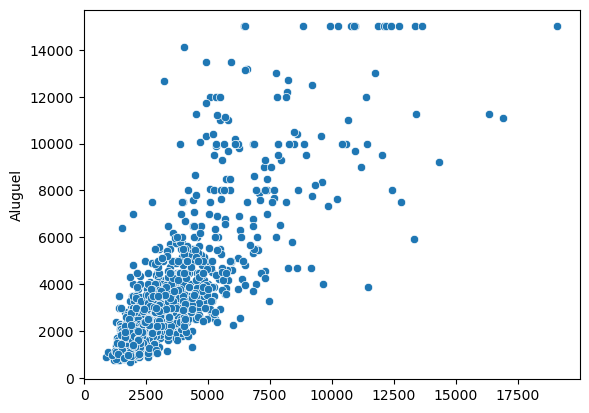

In [108]:
regressao_linear(X_bench2, target_benchmark)

Após ajustarmos o modelo de regressão linear, vamos otimizar seus hiperparametros, buscando um melhor ajuste do modelo ao nosso conjunto de dados.

In [82]:
def otimiza_hiperparametros_regressao_linear(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

    param_grid = {
        'regressor__fit_intercept': [True, False],
        'regressor__copy_X': [True, False]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

    grid_search.fit(X_train, y_train)   

    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Erro médio quadrático (MSE):", mse)
    return

In [84]:
otimiza_hiperparametros_regressao_linear(X_bench1, target_benchmark)

Melhores hiperparâmetros: {'regressor__copy_X': True, 'regressor__fit_intercept': True}
Erro médio quadrático (MSE): 2.040357871240986e+28


In [85]:
def regressao_linear_otimizado(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo = LinearRegression(copy_X=True, fit_intercept= True)
    
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    r2 = r2_score(y_test, y_pred).round(2)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    ax = sns.scatterplot(x=y_pred, y=y_test)
    return

Mean Squared Error: 2496173.65
R^2 Score: 0.66


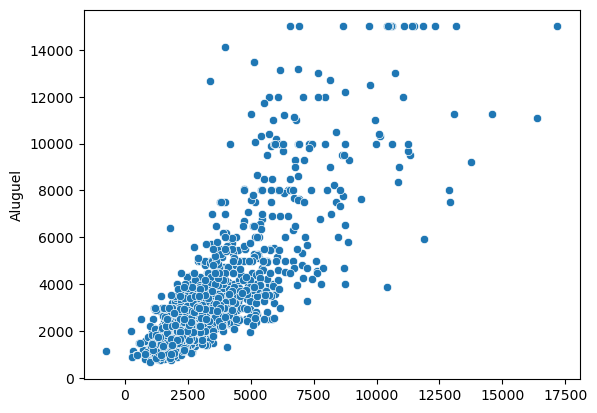

In [109]:
regressao_linear_otimizado(X_bench1, target_benchmark)

Mean Squared Error: 2684160.43
R^2 Score: 0.63


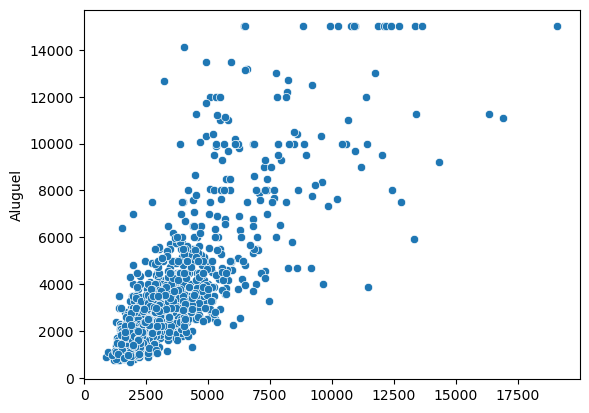

In [110]:
regressao_linear_otimizado(X_bench2, target_benchmark)

Mesmo com a otimização dos hiperparametros, não houve melhoria considerável do R^2.

Como não houve um tratamento detalhado sobre os outliers que observamos, agora vamos ajustar o modelo de regressão linear Huber.

Esse modelo possui maior robustez ao lidar com outliers.

In [89]:
def regressao_linear_huber(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo = HuberRegressor()
    
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    r2 = r2_score(y_test, y_pred).round(2)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    ax = sns.scatterplot(x=y_pred, y=y_test)
    return

Mean Squared Error: 2645315.85
R^2 Score: 0.64


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


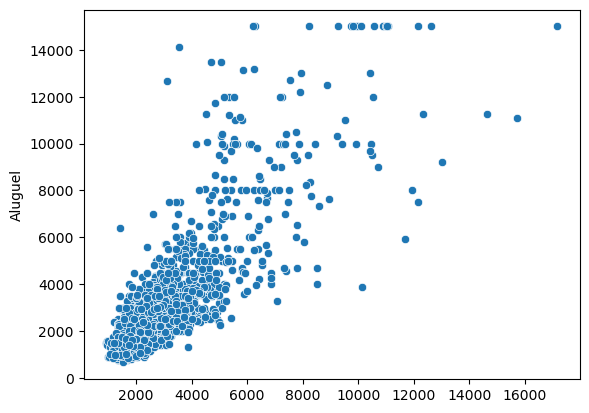

In [192]:
regressao_linear_huber(X_bench1, target_benchmark)

Mean Squared Error: 2789746.08
R^2 Score: 0.62


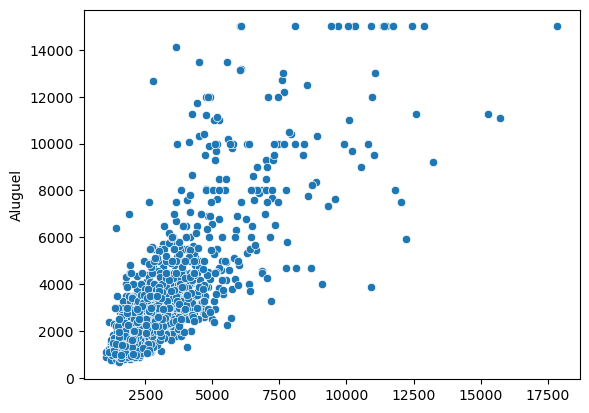

In [112]:
regressao_linear_huber(X_bench2, target_benchmark)

Também vamos otimizar seus hiperparametros.

In [115]:
def otimiza_hiperparametros_regressao_linear_huber(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', HuberRegressor())
    ])

    param_grid = {
        'regressor__epsilon': [1.1, 1.35, 1.5, 1.75, 2.0],
        'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
        'regressor__max_iter': [300, 400, 500, 600],
        'regressor__tol': [1e-3, 1e-4, 1e-5]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

    grid_search.fit(X_train, y_train)   

    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Erro médio quadrático (MSE):", mse)
    return

In [116]:
otimiza_hiperparametros_regressao_linear_huber(X_bench1, target_benchmark)

Melhores hiperparâmetros: {'regressor__alpha': 0.0001, 'regressor__epsilon': 2.0, 'regressor__max_iter': 300, 'regressor__tol': 0.001}
Erro médio quadrático (MSE): 2546307.832250407


In [121]:
def regressao_linear_huber_otimizado(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo = HuberRegressor(alpha=0.0001, epsilon=2.0, max_iter=400, tol=0.001)
    
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    r2 = r2_score(y_test, y_pred).round(2)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    ax = sns.scatterplot(x=y_pred, y=y_test)
    return

Mean Squared Error: 2523173.49
R^2 Score: 0.65


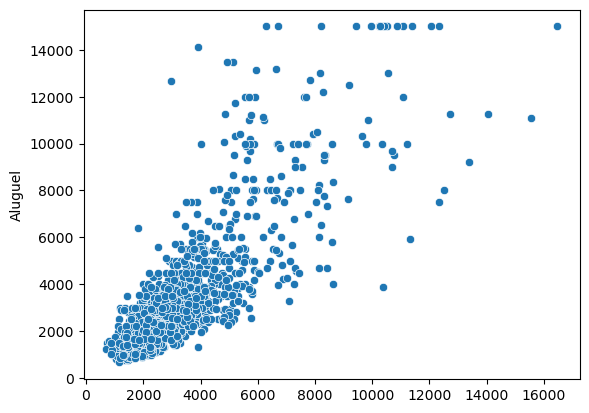

In [122]:
regressao_linear_huber_otimizado(X_bench1, target_benchmark)

Mean Squared Error: 2726664.7
R^2 Score: 0.63


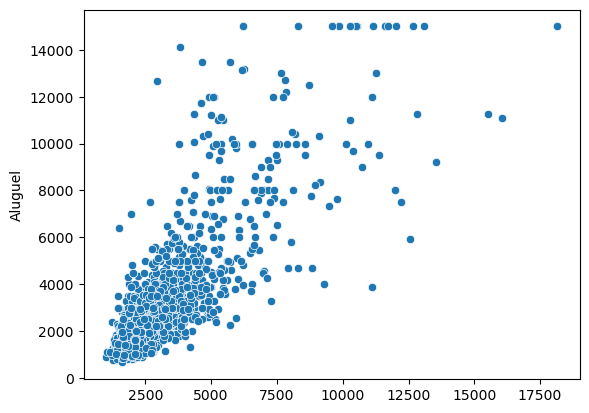

In [123]:
regressao_linear_huber_otimizado(X_bench2, target_benchmark)

Otimização que também não impacto considerável no ajuste.

Como nenhum dos modelos de regressão linear se mostraram com alta eficiência, vamos testar ajustar dois modelos extras.

Iremos ajustar o modelo Random Forest e o Gradient Boosting Tree.

Esses modelos foram escolhidos por tenderem a ser mais precisos que os modelos de regressão linear, mas com processamento mais lento.

In [163]:
def random_forest(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    r2 = r2_score(y_test, y_pred).round(2)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    ax = sns.scatterplot(x=y_pred, y=y_test)
    return

Mean Squared Error: 2438033.41
R^2 Score: 0.67


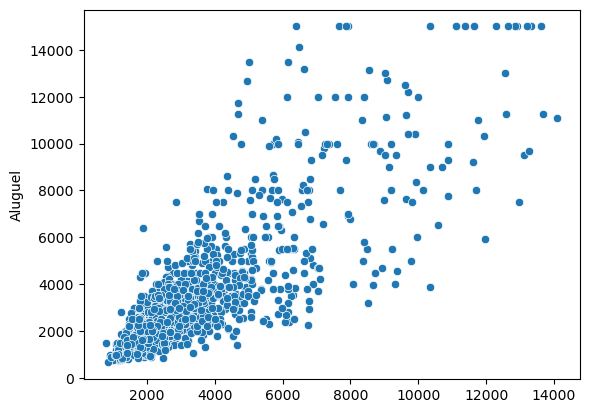

In [164]:
random_forest(X_bench1, target_benchmark)

Mean Squared Error: 2569330.45
R^2 Score: 0.65


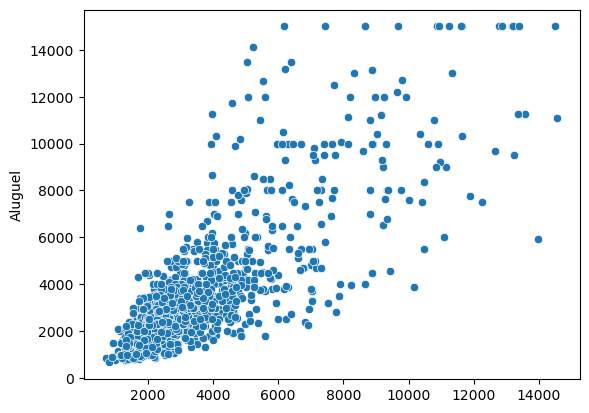

In [165]:
random_forest(X_bench2, target_benchmark)

In [177]:
def otimiza_hiperparametros_random_forest(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor())
    ])

    param_grid = {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

    grid_search.fit(X_train, y_train)   

    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Erro médio quadrático (MSE):", mse)
    return

In [178]:
otimiza_hiperparametros_random_forest(X_bench1, target_benchmark)

Melhores hiperparâmetros: {'regressor__max_depth': 20, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}
Erro médio quadrático (MSE): 2381852.0783634656


In [179]:
def random_forest_otimizado(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo = RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=300, random_state=42)
    
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    r2 = r2_score(y_test, y_pred).round(2)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    ax = sns.scatterplot(x=y_pred, y=y_test)
    return

Mean Squared Error: 2381659.33
R^2 Score: 0.67


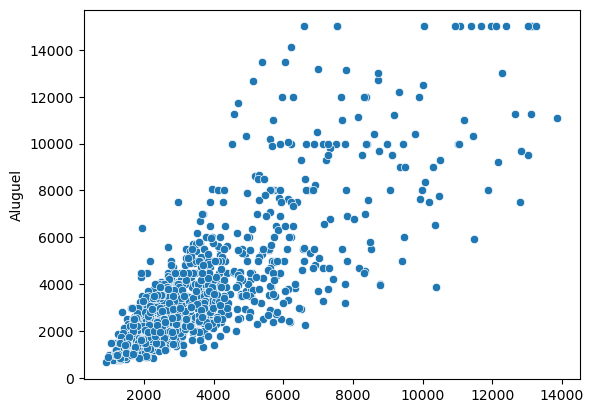

In [180]:
random_forest_otimizado(X_bench1, target_benchmark)

Mean Squared Error: 2441240.06
R^2 Score: 0.67


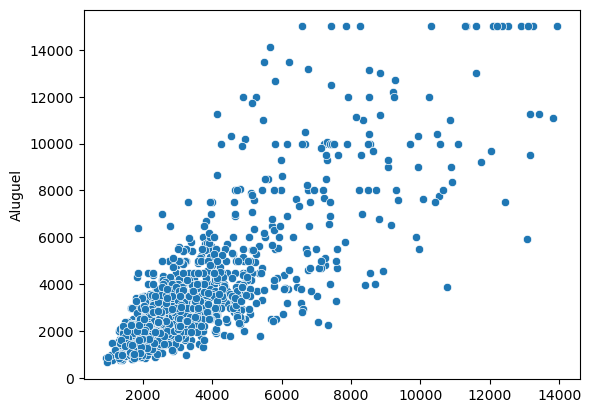

In [181]:
random_forest_otimizado(X_bench2, target_benchmark)

In [183]:
def gradient_boosting_tree(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    r2 = r2_score(y_test, y_pred).round(2)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    ax = sns.scatterplot(x=y_pred, y=y_test)
    return

Mean Squared Error: 2443607.24
R^2 Score: 0.67


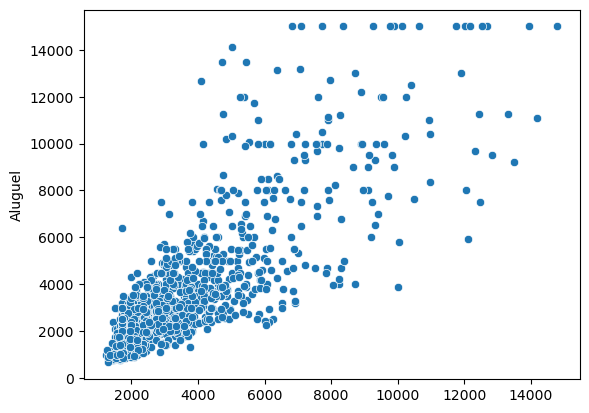

In [184]:
gradient_boosting_tree(X_bench1, target_benchmark)

Mean Squared Error: 2429261.39
R^2 Score: 0.67


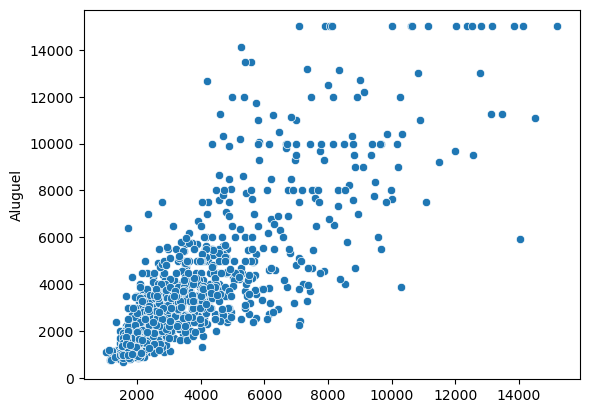

In [185]:
gradient_boosting_tree(X_bench2, target_benchmark)

In [187]:
def otimiza_hiperparametros_gbt(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', GradientBoostingRegressor())
    ])

    param_grid = {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.1, 0.5],
        'regressor__min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

    grid_search.fit(X_train, y_train)   

    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Erro médio quadrático (MSE):", mse)
    return

In [188]:
otimiza_hiperparametros_gbt(X_bench1, target_benchmark)

Melhores hiperparâmetros: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Erro médio quadrático (MSE): 2434350.8974268353


In [189]:
def gradient_boosting_tree_otimizado(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,min_samples_split=10, random_state=42)
    
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    r2 = r2_score(y_test, y_pred).round(2)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    ax = sns.scatterplot(x=y_pred, y=y_test)
    return

Mean Squared Error: 2434851.31
R^2 Score: 0.67


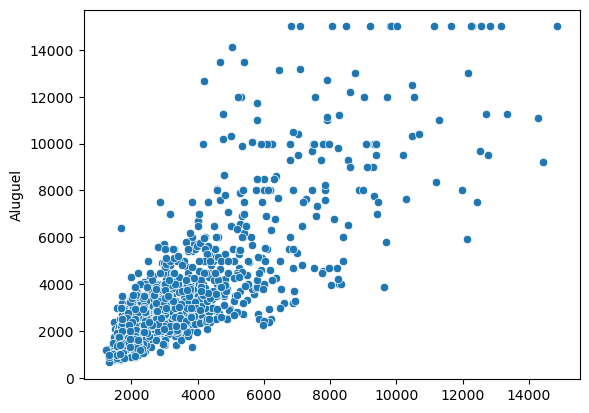

In [190]:
gradient_boosting_tree_otimizado(X_bench1, target_benchmark)

Mean Squared Error: 2426227.84
R^2 Score: 0.67


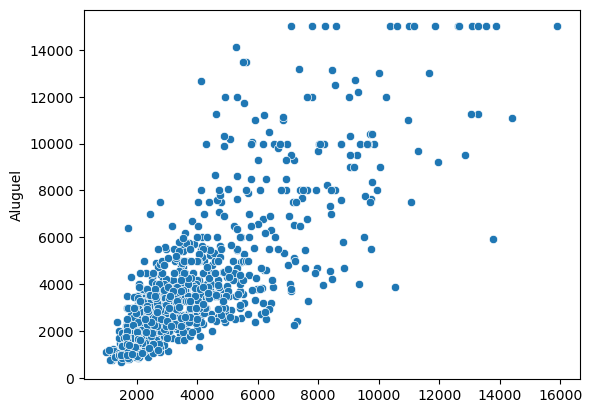

In [191]:
gradient_boosting_tree_otimizado(X_bench2, target_benchmark)

# 6. Conclusão

Neste projeto realizamos a análise de um conjunto de dados de preços de aluguéis em São Paulo utilizando Python e algumas de suas bibliotecas. O projeto abrangiu a importação, tratamento, visualização e ajuste de modelos preditivos.

Assim que iniciamos o tratamento dos dados, observamos que a distribuição geográfica das informações estava bastante complexa, com 1199 distritos. Com esse valor de distritos, sugerimos a hipotese de que o conjunto de dados é sobre a região metropolitana de São Paulo. Dessa forma, com essa distribuição seria muito dificil realizar o ajuste de um modelo de regressão linear, pois é um modelo bastante simples, então o conjunto foi divido entre os distritos oficiais da cidade de São Paulo (também adicionamos a qual zona da cidade cada distrito pertence) e os outros. Após realizarmos esses agrupamentos, o conjunto que decidimos dar foco (distritos oficiais) ficou com uma quantidade pequena de dados, com 3689 linhas (conjunto inicial de 11657 linhas). 

Com o tratamento e preparação dos dados realizado, partimos para o ajuste dos modelos preditivos. Foram realizados ajustes para o conjunto de dados utilizando como categoria o seu distrito ou a sua zona, mas não foi observado nenhuma diferença considerável entre a escolha de categoria. Também não foi observada grande diferença da eficiência e precisão entre os modelos, uma hipótese para o resultado do R² (que ficou por volta de 0.6) é a quantidade de dados fornecidas para os modelos, talvez com um tratamento mais complexo para o conjunto de dados "bruto", obteriamos mais pontos e seria possível obter um resultado melhor.

De qualquer forma, com o conjunto apresentado foi possível obter valiosas informações sobre a relação das variáveis (área, quartos, garagem, aluguel) e o tipo de imóvel a partir da aplicação de técnicas de estatística, apresentando essas informações na forma de gráficos. Também iniciamos o desenvolvimento de modelos preditivos que provavelmente com mais alguns ajustes (desde o conjunto de dados até os modelos finais) seja possível ser concluido e aplicável.